In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

# Set paths
DATASET_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_NB15_testing-set.csv"
OUTPUT_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

# Load dataset
print("Loading UNSW-NB15 test set...")
df = pd.read_csv(DATASET_PATH)
print("Initial shape:", df.shape)

# Step 1: Binary Label
df['Label'] = df['label'].map({0: 'Benign', 1: 'Attack'})  # For consistency with your INADS code
df['Binary_Label'] = df['label']  # 0=Benign, 1=Attack

# Step 2: Simulate timestamp if missing (UNSW lacks real time info)
# We'll simulate timestamps as evenly spaced points from a fake base time
base_time = datetime(2025, 1, 1, 0, 0, 0)
df['Timestamp'] = pd.date_range(start=base_time, periods=len(df), freq='S')

# Step 3: Add cyclical time features
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.weekday
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday'] / 7)
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday'] / 7)

# Step 4: Rename key fields for consistency if needed
# e.g., map feature names to what INADS expects (if any mismatch exists)
# You can add your mapping logic here if needed

# Step 5: Save the processed file
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
df.to_csv(OUTPUT_PATH, index=False)
print(f"Saved preprocessed dataset to: {OUTPUT_PATH}")
print("Final shape:", df.shape)

Loading UNSW-NB15 test set...
Initial shape: (82332, 45)


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_13195/3910672599.py:22: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['Timestamp'] = pd.date_range(start=base_time, periods=len(df), freq='S')


Saved preprocessed dataset to: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv
Final shape: (82332, 54)


In [6]:
import pandas as pd

# Paths
DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

# Load dataset
df = pd.read_csv(DATA_PATH)
print(f"Loaded dataset with shape: {df.shape}\n")

# Define required features
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"
]

edge_features = [
    "Pkt Len Min", "Pkt Len Max", 
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", 
    "Fwd Pkts/s", "Bwd Pkts/s", 
    "Fwd IAT Mean"
]

device_features = [
    "Dst Port",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Pkt Len Var", "Fwd Pkt Len Std", "Bwd Pkt Len Std",
    "Flow Duration", "Flow IAT Mean", "Flow IAT Std",
    "Idle Max", "Idle Mean", "Active Min", "Active Max",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len",
    "Pkt Size Avg", "Fwd Seg Size Avg", "Bwd Seg Size Avg",
    "Hour_sin", "Hour_cos"
]

# Utility function
def check_features(name, required_features):
    print(f"\nChecking {name} Layer features:")
    missing = [f for f in required_features if f not in df.columns]
    if missing:
        print(f"Missing {len(missing)} features: {missing}")
    else:
        print(f"All {len(required_features)} features are present.")

# Run validation
check_features("Global", global_features)
check_features("Edge", edge_features)
check_features("Device", device_features)

Loaded dataset with shape: (82332, 54)


Checking Global Layer features:
Missing 19 features: ['Flow Duration', 'Flow Byts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Dst Port', 'Protocol', 'SYN Flag Cnt', 'ACK Flag Cnt', 'FIN Flag Cnt', 'PSH Flag Cnt', 'Pkt Len Min', 'Pkt Len Max', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Fwd Pkt Len Max', 'Bwd Pkt Len Min', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts']

Checking Edge Layer features:
Missing 7 features: ['Pkt Len Min', 'Pkt Len Max', 'Fwd Pkt Len Max', 'Bwd Pkt Len Min', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Fwd IAT Mean']

Checking Device Layer features:
Missing 20 features: ['Dst Port', 'Fwd Pkt Len Max', 'Bwd Pkt Len Min', 'Pkt Len Var', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow Duration', 'Flow IAT Mean', 'Flow IAT Std', 'Idle Max', 'Idle Mean', 'Active Min', 'Active Max', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Header Len', 'Bwd Header Len', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg']


In [10]:
import pandas as pd
import numpy as np
import os

# Load the raw cyclical-encoded UNSW data (already timestamped and labeled)
INPUT_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
OUTPUT_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/UNSW_Patched_Features.csv"

print("🔄 Loading original UNSW dataset...")
df = pd.read_csv(INPUT_PATH)

# Start creating a patched DataFrame with essential INADS features
patched_df = pd.DataFrame()

# -------------------------------
# Global Layer Features
# -------------------------------
patched_df["Flow Duration"]    = df.get("dur", 0)
patched_df["Flow Byts/s"]      = df.get("rate", 0)
patched_df["Flow IAT Mean"]    = df.get("meaniat", 0)
patched_df["Flow IAT Std"]     = df.get("stdiat", 0)
patched_df["Flow IAT Max"]     = df.get("maxiat", 0)

patched_df["Dst Port"]         = df.get("dport", 0)
patched_df["Protocol"]         = df.get("proto", 0)

patched_df["SYN Flag Cnt"]     = 0  # Not available
patched_df["ACK Flag Cnt"]     = df.get("ackdat", 0)
patched_df["FIN Flag Cnt"]     = 0  # Not available
patched_df["PSH Flag Cnt"]     = 0  # Not available

patched_df["Pkt Len Min"]      = df.get("min", 0)
patched_df["Pkt Len Max"]      = df.get("max", 0)

# Avoid division by zero in packet rate estimation
dur_safe = df["dur"] + 1e-5
patched_df["Fwd Pkts/s"]       = df.get("sbytes", 0) / dur_safe
patched_df["Bwd Pkts/s"]       = df.get("dbytes", 0) / dur_safe

patched_df["Fwd Pkt Len Max"]  = df.get("sbytes", 0)  # Approximate
patched_df["Bwd Pkt Len Min"]  = df.get("dbytes", 0)  # Approximate

patched_df["TotLen Fwd Pkts"]  = df.get("sbytes", 0)
patched_df["TotLen Bwd Pkts"]  = df.get("dbytes", 0)

# -------------------------------
# Device Layer Extra Features
# -------------------------------
patched_df["Pkt Len Var"]          = df.get("varpktlen", 0)
patched_df["Fwd Pkt Len Std"]      = df.get("stddev", 0)
patched_df["Bwd Pkt Len Std"]      = df.get("stddev", 0)  # Best approximation

patched_df["Flow IAT Std"]         = df.get("stdiat", 0)
patched_df["Idle Max"]             = 0
patched_df["Idle Mean"]            = 0
patched_df["Active Min"]           = 0
patched_df["Active Max"]           = 0

patched_df["Init Fwd Win Byts"]    = 0
patched_df["Init Bwd Win Byts"]    = 0
patched_df["Fwd Header Len"]       = 0
patched_df["Bwd Header Len"]       = 0

patched_df["Pkt Size Avg"]         = df.get("meanpktlen", 0)
patched_df["Fwd Seg Size Avg"]     = 0
patched_df["Bwd Seg Size Avg"]     = 0

# -------------------------------
# Cyclical Features
# -------------------------------
patched_df["Hour_sin"] = df["Hour_sin"]
patched_df["Hour_cos"] = df["Hour_cos"]
patched_df["Weekday_sin"] = df["Weekday_sin"]
patched_df["Weekday_cos"] = df["Weekday_cos"]

# -------------------------------
# Labels
# -------------------------------
patched_df["Binary_Label"] = df["Binary_Label"]
patched_df["Label"] = df["Label"]

# -------------------------------
# Save patched dataset
# -------------------------------
patched_df.to_csv(OUTPUT_PATH, index=False)
print(f"Patched UNSW dataset saved to: {OUTPUT_PATH}")
print("Final shape:", patched_df.shape)

🔄 Loading original UNSW dataset...
Patched UNSW dataset saved to: /Users/akashthanneeru/Desktop/INADS_Data/Data/UNSW_Patched_Features.csv
Final shape: (82332, 39)


In [6]:
import os
import numpy as np
import pandas as pd
import joblib
import hashlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)

# -------------------------------
# Step 0: Paths & Setup
# -------------------------------
UNSW_DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/UNSW_Patched_Features.csv"
RESULTS_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final"
os.makedirs(RESULTS_DIR, exist_ok=True)

GLOBAL_MODEL_PATH = os.path.join(RESULTS_DIR, "Global/xgb_global_model.pkl")
EDGE_MODEL_PATH = os.path.join(RESULTS_DIR, "Edge/LSTM/edge_layer_lstm_best.keras")
DEVICE_MODEL_PATH = os.path.join(RESULTS_DIR, "Device/device_layer_mlp_model.h5")

# Set seeds
np.random.seed(42)
tf.random.set_seed(42)

# -------------------------------
# Step 1: Load Dataset & Hash
# -------------------------------
def get_file_hash(path):
    with open(path, 'rb') as f:
        return hashlib.sha256(f.read()).hexdigest()

timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
dataset_hash = get_file_hash(UNSW_DATA_PATH)
print(f"🔐 Dataset Hash: {dataset_hash[:8]}")
print(f"🕒 Timestamp   : {timestamp}")

df = pd.read_csv(UNSW_DATA_PATH)
print(f"✅ Loaded UNSW dataset: {df.shape}")

# Add binary label if missing
df["Binary_Label"] = np.where(df["Label"].str.lower() == "benign", 0, 1)
y_true = df["Binary_Label"].values

# -------------------------------
# Step 2: Encode Protocol
# -------------------------------
if df["Protocol"].dtype == object or df["Protocol"].dtype.name == "category":
    proto_encoder = LabelEncoder()
    df["Protocol"] = proto_encoder.fit_transform(df["Protocol"])

# -------------------------------
# Step 3: Define Feature Sets
# -------------------------------
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"
]

edge_features = [
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Fwd Pkts/s", "Bwd Pkts/s", "Fwd IAT Mean"
]

device_features = [
    "Dst Port", "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Pkt Len Var",
    "Fwd Pkt Len Std", "Bwd Pkt Len Std", "Flow Duration",
    "Flow IAT Mean", "Flow IAT Std", "Idle Max", "Idle Mean",
    "Active Min", "Active Max", "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len", "Pkt Size Avg",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Hour_sin", "Hour_cos"
]

# -------------------------------
# Step 4: Load Models
# -------------------------------
print("📥 Loading Global model...")
global_model = joblib.load(GLOBAL_MODEL_PATH)

print("📥 Loading Edge LSTM model...")
edge_model = load_model(EDGE_MODEL_PATH)

print("📥 Loading Device MLP model...")
device_model = load_model(DEVICE_MODEL_PATH)

# -------------------------------
# Step 5: Scale & Predict
# -------------------------------
scaler = StandardScaler()

# Global
X_global = scaler.fit_transform(df[global_features])
global_probs = global_model.predict_proba(X_global)
global_conf = 1.0 - global_probs[:, 0]

# Edge
X_edge = scaler.fit_transform(df[edge_features])
seq_len = 5
X_edge_seq = np.array([X_edge[i:i+seq_len] for i in range(len(X_edge) - seq_len + 1)])
edge_probs = edge_model.predict(X_edge_seq, batch_size=64)
edge_conf = 1.0 - edge_probs.mean(axis=1)[:, 0]

# Device
X_device = scaler.fit_transform(df[device_features])
device_conf = device_model.predict(X_device, batch_size=64).flatten()

# -------------------------------
# Step 6: Align, Fuse, Predict
# -------------------------------
min_len = min(len(global_conf), len(edge_conf), len(device_conf))
global_conf = global_conf[:min_len]
edge_conf = edge_conf[:min_len]
device_conf = device_conf[:min_len]
y_true = y_true[:min_len]

w_global, w_edge, w_device = 0.3, 0.3, 0.4
fused_score = (
    w_global * global_conf +
    w_edge * edge_conf +
    w_device * device_conf
)
fused_label = (fused_score > 0.5).astype(int)

# -------------------------------
# Step 7: Evaluate
# -------------------------------
acc = accuracy_score(y_true, fused_label)
cm = confusion_matrix(y_true, fused_label)
report = classification_report(y_true, fused_label, target_names=["Benign", "Attack"])
fpr, tpr, _ = roc_curve(y_true, fused_score)
roc_auc = auc(fpr, tpr)

print(f"\n✅ Accuracy: {acc:.4f}")
print(report)

# -------------------------------
# Step 8: Save Results
# -------------------------------
results_df = pd.DataFrame({
    "True_Label": y_true,
    "Global_Conf": global_conf,
    "Edge_Conf": edge_conf,
    "Device_Conf": device_conf,
    "Fused_Score": fused_score,
    "Fused_Label": fused_label
})
csv_path = os.path.join(RESULTS_DIR, f"core_layer_results_unsw_{dataset_hash[:8]}.csv")
results_df.to_csv(csv_path, index=False)
print(f"💾 Saved CSV: {csv_path}")

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Attack"], yticklabels=["Benign", "Attack"])
plt.title("Confusion Matrix (Core Layer - UNSW)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
cm_path = os.path.join(RESULTS_DIR, f"core_layer_confusion_unsw_{dataset_hash[:8]}.png")
plt.savefig(cm_path)
plt.close()
print(f"📊 Saved Confusion Matrix: {cm_path}")

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Core Layer - UNSW)")
plt.legend()
roc_path = os.path.join(RESULTS_DIR, f"core_layer_roc_unsw_{dataset_hash[:8]}.png")
plt.savefig(roc_path)
plt.close()
print(f"📈 Saved ROC Curve: {roc_path}")

# Report
report_path = os.path.join(RESULTS_DIR, f"unsw_validation_report_{dataset_hash[:8]}.txt")
with open(report_path, "w") as f:
    f.write("INADS - Core Fusion Layer Report (UNSW-NB15)\n")
    f.write("===========================================\n")
    f.write(f"Timestamp     : {timestamp}\n")
    f.write(f"Dataset Hash  : {dataset_hash}\n")
    f.write(f"Accuracy      : {acc:.4f}\n")
    f.write(f"ROC AUC       : {roc_auc:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(report)
    f.write("\nConfusion Matrix:\n")
    f.write(np.array2string(cm))
print(f"📄 Saved Report: {report_path}")

🔐 Dataset Hash: 1e3c50f8
🕒 Timestamp   : 2025-04-14_02-55-16
✅ Loaded UNSW dataset: (82332, 39)
📥 Loading Global model...
📥 Loading Edge LSTM model...


📥 Loading Device MLP model...


KeyError: "['Fwd IAT Mean'] not in index"

In [20]:
import pandas as pd

# ========== CONFIG ==========
DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"  #or UNSW_Patched_Features.csv

# INADS Feature Definitions
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"
]

edge_features = [
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Fwd Pkts/s", "Bwd Pkts/s", "Fwd IAT Mean"
]

device_features = [
    "Dst Port", "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Pkt Len Var",
    "Fwd Pkt Len Std", "Bwd Pkt Len Std", "Flow Duration",
    "Flow IAT Mean", "Flow IAT Std", "Idle Max", "Idle Mean",
    "Active Min", "Active Max", "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len", "Pkt Size Avg",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Hour_sin", "Hour_cos"
]

# ========== Load Dataset ==========
df = pd.read_csv(DATA_PATH)
print(f"\n✅ Loaded Dataset: {DATA_PATH}")
print(f"📊 Shape: {df.shape}")

# ========== Label Inspection ==========
label_col = "Label" if "Label" in df.columns else "Attack Type"
print(f"\n🔎 Label Distribution in `{label_col}`:")
print(df[label_col].value_counts(dropna=False))

if "Binary_Label" in df.columns:
    print("\n✅ Binary_Label Distribution:")
    print(df["Binary_Label"].value_counts())

# ========== Feature Set Inspection ==========
def check_missing(layer_name, feature_list):
    print(f"\n🔍 {layer_name} Features Check:")
    missing = [f for f in feature_list if f not in df.columns]
    if missing:
        print(f"❌ Missing ({len(missing)}): {missing}")
    else:
        print(f"✅ All {len(feature_list)} features are present.")

check_missing("Global Layer", global_features)
check_missing("Edge Layer", edge_features)
check_missing("Device Layer", device_features)

# ========== Quick Dataset Type Guess ==========
print("\n📌 Dataset Type Guess:")
if "Dst Port" in df.columns and "Flow Duration" in df.columns and "Fwd Pkt Len Max" in df.columns:
    if "Proto" in df.columns or "dbytes" in df.columns:
        print("➡️ Likely UNSW-NB15")
    elif "Dst Port" in df.columns and "Active Min" in df.columns:
        print("➡️ Likely CICIDS 2018/2019")
    else:
        print("➡️ Possibly patched version or hybrid")
else:
    print("⚠️ Could not confidently detect dataset type.")


✅ Loaded Dataset: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv
📊 Shape: (2270317, 90)

🔎 Label Distribution in `Label`:
Label
Benign                    1573665
DDoS attacks-LOIC-HTTP     576175
Infilteration               68224
DoS attacks-GoldenEye       41455
DoS attacks-Slowloris       10285
Brute Force -Web              362
Brute Force -XSS              151
Name: count, dtype: int64

✅ Binary_Label Distribution:
Binary_Label
0    1573665
1     696652
Name: count, dtype: int64

🔍 Global Layer Features Check:
✅ All 23 features are present.

🔍 Edge Layer Features Check:
✅ All 7 features are present.

🔍 Device Layer Features Check:
✅ All 22 features are present.

📌 Dataset Type Guess:
➡️ Likely CICIDS 2018/2019


In [14]:
import pandas as pd

# ========== CONFIG ==========
DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed_Backup.csv"  #or UNSW_Patched_Features.csv

# INADS Feature Definitions
global_features = [
    "Flow Duration", "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Dst Port", "Protocol", "SYN Flag Cnt", "ACK Flag Cnt", "FIN Flag Cnt", "PSH Flag Cnt",
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "TotLen Fwd Pkts", "TotLen Bwd Pkts",
    "Hour_sin", "Hour_cos", "Weekday_sin", "Weekday_cos"
]

edge_features = [
    "Pkt Len Min", "Pkt Len Max", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Fwd Pkts/s", "Bwd Pkts/s", "Fwd IAT Mean"
]

device_features = [
    "Dst Port", "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Pkt Len Var",
    "Fwd Pkt Len Std", "Bwd Pkt Len Std", "Flow Duration",
    "Flow IAT Mean", "Flow IAT Std", "Idle Max", "Idle Mean",
    "Active Min", "Active Max", "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Fwd Header Len", "Bwd Header Len", "Pkt Size Avg",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Hour_sin", "Hour_cos"
]

# ========== Load Dataset ==========
df = pd.read_csv(DATA_PATH)
print(f"\n✅ Loaded Dataset: {DATA_PATH}")
print(f"📊 Shape: {df.shape}")

# ========== Label Inspection ==========
label_col = "Label" if "Label" in df.columns else "Attack Type"
print(f"\n🔎 Label Distribution in `{label_col}`:")
print(df[label_col].value_counts(dropna=False))

if "Binary_Label" in df.columns:
    print("\n✅ Binary_Label Distribution:")
    print(df["Binary_Label"].value_counts())

# ========== Feature Set Inspection ==========
def check_missing(layer_name, feature_list):
    print(f"\n🔍 {layer_name} Features Check:")
    missing = [f for f in feature_list if f not in df.columns]
    if missing:
        print(f"❌ Missing ({len(missing)}): {missing}")
    else:
        print(f"✅ All {len(feature_list)} features are present.")

check_missing("Global Layer", global_features)
check_missing("Edge Layer", edge_features)
check_missing("Device Layer", device_features)

# ========== Quick Dataset Type Guess ==========
print("\n📌 Dataset Type Guess:")
if "Dst Port" in df.columns and "Flow Duration" in df.columns and "Fwd Pkt Len Max" in df.columns:
    if "Proto" in df.columns or "dbytes" in df.columns:
        print("➡️ Likely UNSW-NB15")
    elif "Dst Port" in df.columns and "Active Min" in df.columns:
        print("➡️ Likely CICIDS 2018/2019")
    else:
        print("➡️ Possibly patched version or hybrid")
else:
    print("⚠️ Could not confidently detect dataset type.")


✅ Loaded Dataset: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed_Backup.csv
📊 Shape: (2270317, 85)

🔎 Label Distribution in `Label`:
Label
Benign                    1573665
DDoS attacks-LOIC-HTTP     576175
Infilteration               68224
DoS attacks-GoldenEye       41455
DoS attacks-Slowloris       10285
Brute Force -Web              362
Brute Force -XSS              151
Name: count, dtype: int64

🔍 Global Layer Features Check:
❌ Missing (4): ['Hour_sin', 'Hour_cos', 'Weekday_sin', 'Weekday_cos']

🔍 Edge Layer Features Check:
✅ All 7 features are present.

🔍 Device Layer Features Check:
❌ Missing (2): ['Hour_sin', 'Hour_cos']

📌 Dataset Type Guess:
➡️ Likely CICIDS 2018/2019


In [16]:
import pandas as pd

# ======= CONFIG =======
DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed_Backup.csv"
# ======================

# Load dataset
df = pd.read_csv(DATA_PATH)
print(f"✅ Loaded dataset: {DATA_PATH}")
print(f"📊 Shape: {df.shape}\n")

# Display all attributes
print("🧠 Attribute Summary:\n")
summary = []

for i, col in enumerate(df.columns):
    dtype = df[col].dtype
    nulls = df[col].isnull().sum()
    unique_vals = df[col].nunique()
    sample_vals = df[col].dropna().unique()[:5]
    summary.append((i, col, dtype, nulls, unique_vals, sample_vals))

# Create a DataFrame view
attr_df = pd.DataFrame(summary, columns=["Index", "Column", "Type", "Missing", "Unique", "Sample_Values"])

# Display as a table
pd.set_option("display.max_rows", None)  # show all
print(attr_df.to_string(index=False))

✅ Loaded dataset: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed_Backup.csv
📊 Shape: (2270317, 85)

🧠 Attribute Summary:

 Index            Column    Type  Missing  Unique                                                                                                                                                              Sample_Values
     0         Unique_ID  object        0 2270317 [1c26ebaefde66596cc3c298be777a338, bfb8cd0db2ba7dc420064158797f38a6, 0ef4f2a5a357de7cbde43100fb5d04f8, fb5e53288fc10f9e1bdc147faa56374a, 15dd662e119e1bc4fe77eaffd22f6a43]
     1          Dst Port float64        0   54241                                                                                                                                         [443.0, 445.0, 80.0, 0.0, 49689.0]
     2          Protocol float64        0       3                                                                                                                                   

In [18]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

# ====== Paths ======
INPUT_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed_Backup.csv"
OUTPUT_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

# ====== Load Dataset ======
print("🔄 Loading backup CICIDS dataset...")
df = pd.read_csv(INPUT_PATH)
print("Shape:", df.shape)

# ====== Add Binary Label ======
df["Binary_Label"] = df["Label"].apply(lambda x: 0 if x.strip().lower() == "benign" else 1)

# ====== Check Timestamp Columns ======
if "Hour" not in df.columns or "Weekday" not in df.columns:
    print("Hour or Weekday column not found. Add timestamp-based columns first.")
    exit()

# ====== Add Cyclical Features ======
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)
df["Weekday_sin"] = np.sin(2 * np.pi * df["Weekday"] / 7)
df["Weekday_cos"] = np.cos(2 * np.pi * df["Weekday"] / 7)

# ====== Save Final Version ======
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
df.to_csv(OUTPUT_PATH, index=False)
print(f"\nReconstructed INADS-compatible dataset saved to:\n{OUTPUT_PATH}")
print("Final Shape:", df.shape)

🔄 Loading backup CICIDS dataset...
Shape: (2270317, 85)

Reconstructed INADS-compatible dataset saved to:
/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv
Final Shape: (2270317, 90)


In [28]:
import pandas as pd

# Define paths for the four parts
paths = [
    "/Users/akashthanneeru/Desktop/INADS_Data/Data/UNSW-NB15_1.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/Data/UNSW-NB15_2.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/Data/UNSW-NB15_3.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/Data/UNSW-NB15_4.csv"
]

# Load and concatenate
dfs = [pd.read_csv(p) for p in paths]
df = pd.concat(dfs, ignore_index=True)

# Report shape
print(f"✅ Merged shape: {df.shape}")

# Show first few column names
print("\n🧠 First 15 column names:")
print(df.columns[:15].tolist())

# Check datatype and uniqueness
print("\n🧪 Sample attribute inspection:")
print(df.dtypes.head(10))

# Optional: Print label stats if 'label' exists
if 'label' in df.columns:
    print("\n📊 Label Distribution (raw):")
    print(df['label'].value_counts())

/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_14080/3139307844.py:12: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(p) for p in paths]
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_14080/3139307844.py:12: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(p) for p in paths]


✅ Merged shape: (2540043, 139)

🧠 First 15 column names:
['59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055', '132', '164', '31', '29', '0', '0.1', 'dns', '500473.9375']

🧪 Sample attribute inspection:
59.166.0.0        object
1390              object
149.171.126.6     object
53                object
udp               object
CON               object
0.001055         float64
132              float64
164              float64
31                 int64
dtype: object


In [32]:
import pandas as pd

# Step 1: Load header names from UNSW feature file
feature_file = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_features.csv"
feature_names_df = pd.read_csv(feature_file)
headers = feature_names_df["Name"].tolist() + ["label"]  # last column is label

# Step 2: Define raw data file paths
paths = [
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_1.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_2.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_3.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_4.csv"
]

# Step 3: Reload with header override
dfs = [pd.read_csv(p, names=headers, skiprows=1, low_memory=False) for p in paths]
df = pd.concat(dfs, ignore_index=True)

# Step 4: Inspect
print(f"✅ Merged with correct headers. Shape: {df.shape}")
print("\n🧠 First 15 column names:\n", df.columns[:15].tolist())
print("\n📊 Label Distribution:\n", df["label"].value_counts())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 1646: invalid start byte

In [34]:
# Step 1: Load header names from UNSW feature file with encoding fix
feature_file = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_features.csv"
feature_names_df = pd.read_csv(feature_file, encoding='cp1252')  # <-- fix here
headers = feature_names_df["Name"].tolist() + ["label"]

In [38]:
feature_names_df.shape

(49, 4)

In [40]:
feature_names_df.columns[:15].tolist()

['No.', 'Name', 'Type ', 'Description']

In [42]:
import pandas as pd

# Load official feature list
feature_file = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_features.csv"
feature_df = pd.read_csv(feature_file, encoding="cp1252")  # fix encoding

# Extract official names
official_features = feature_df["Name"].tolist()
print(f"🔍 Official UNSW Features ({len(official_features)}):\n{official_features}")

🔍 Official UNSW Features (49):
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']


In [44]:
# Current merged dataset columns
current_columns = df.columns.tolist()

# Find differences
missing_from_data = [f for f in official_features if f not in current_columns]
extra_in_data = [f for f in current_columns if f not in official_features and f != "label"]

print("\n❌ Missing in Merged Dataset (but expected):")
print(missing_from_data)

print("\n➕ Extra in Merged Dataset (not in official list):")
print(extra_in_data)


❌ Missing in Merged Dataset (but expected):
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

➕ Extra in Merged Dataset (not in official list):
['59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055', '132', '164', '31', '29', '0', '0.1', 'dns', '500473.9375', '621800.9375', '2', '2.1', '0.2', '0.3', '0.4', '0.5', '66', '82', '0.6', '0.7', '0.8', '0.9', '1421927414', '1421927414.1', '0.017', '0.013', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '3', '

In [46]:
import pandas as pd

# 1. Load official headers
feature_path = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_features.csv"
feature_df = pd.read_csv(feature_path, encoding="cp1252")
unsw_headers = feature_df["Name"].tolist() + ["label"]  # Total: 49 + 1 = 50

# 2. File paths
unsw_parts = [
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_1.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_2.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_3.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_4.csv"
]

# 3. Reload with correct headers
dfs = [pd.read_csv(f, header=None, names=unsw_headers, low_memory=False) for f in unsw_parts]
df = pd.concat(dfs, ignore_index=True)

# 4. Final check
print(f"✅ Final shape: {df.shape}")
print(f"\n🧠 First 10 columns:\n{df.columns[:10].tolist()}")
print(f"\n📊 Label Distribution:\n{df['label'].value_counts()}")

✅ Final shape: (2540047, 50)

🧠 First 10 columns:
['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl']

📊 Label Distribution:
Series([], Name: count, dtype: int64)


In [48]:
print(df['label'].value_counts())

Series([], Name: count, dtype: int64)


In [50]:
print(f"Last column name: {df.columns[-1]!r}")

Last column name: 'label'


In [52]:
for idx, file in enumerate(unsw_parts, start=1):
    df_check = pd.read_csv(file, header=None, low_memory=False)
    print(f"UNSW-NB15_{idx}.csv → shape: {df_check.shape}")

UNSW-NB15_1.csv → shape: (700001, 49)
UNSW-NB15_2.csv → shape: (700001, 49)
UNSW-NB15_3.csv → shape: (700001, 49)
UNSW-NB15_4.csv → shape: (440044, 49)


In [54]:
import pandas as pd

# Step 1: Load just the 49 feature names (skip 'label')
feature_path = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_features.csv"
feature_df = pd.read_csv(feature_path, encoding="cp1252")
unsw_headers = feature_df["Name"].tolist()  # Exclude label

# Step 2: Load raw UNSW parts (49 features only)
unsw_parts = [
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_1.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_2.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_3.csv",
    "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW-NB15_4.csv"
]
dfs = [pd.read_csv(f, header=None, names=unsw_headers, low_memory=False) for f in unsw_parts]
df_raw = pd.concat(dfs, ignore_index=True)

# Step 3: Load ground truth
gt_path = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/NUSW-NB15_GT.csv"
df_gt = pd.read_csv(gt_path)

# Step 4: Merge on 'id'
df_merged = df_raw.merge(df_gt[['id', 'label', 'attack_cat']], on='id', how='left')

# Step 5: Final check
print(f"✅ Final Merged Shape: {df_merged.shape}")
print(f"\n📊 Label Distribution:\n{df_merged['label'].value_counts()}")

KeyError: "None of [Index(['id', 'label', 'attack_cat'], dtype='object')] are in the [columns]"

In [60]:
import pandas as pd

# Full path to GT file
gt_path = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/NUSW-NB15_GT.csv"

# Load with safe encoding and no assumptions
df_gt = pd.read_csv(gt_path, encoding="cp1252")

# Clean column names (strip spaces and lowercase for inspection)
df_gt.columns = df_gt.columns.str.strip()

# Print full column name list for validation
print("🧠 Ground Truth Column Names:")
print(df_gt.columns.tolist())

🧠 Ground Truth Column Names:
['Start time', 'Last time', 'Attack category', 'Attack subcategory', 'Protocol', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Attack Name', 'Attack Reference', '.']


In [62]:
import os
import pandas as pd

# Path to your UNSW folder
unsw_dir = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW"

print("🔎 Scanning all .csv files in UNSW folder...\n")

# Loop through all .csv files in the folder
for file in sorted(os.listdir(unsw_dir)):
    if file.endswith(".csv"):
        path = os.path.join(unsw_dir, file)
        print(f"📂 File: {file}")
        try:
            df = pd.read_csv(path, encoding='cp1252', nrows=2)
            print(f"📊 Shape: {pd.read_csv(path, encoding='cp1252').shape}")
            print(f"🧠 Columns ({len(df.columns)}): {df.columns.tolist()}")
            print(f"🔍 Preview:\n{df.head(2)}\n")
        except Exception as e:
            print(f"❌ Error reading file: {e}\n")

🔎 Scanning all .csv files in UNSW folder...

📂 File: NUSW-NB15_GT.csv
📊 Shape: (174347, 12)
🧠 Columns (12): ['Start time', 'Last time', 'Attack category', 'Attack subcategory', 'Protocol', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Attack Name', 'Attack Reference', '.']
🔍 Preview:
   Start time   Last time Attack category Attack subcategory Protocol  \
0  1421927414  1421927416  Reconnaissance               HTTP      tcp   
1  1421927415  1421927415        Exploits   Unix 'r' Service      udp   

      Source IP  Source Port  Destination IP  Destination Port  \
0  175.45.176.0        13284  149.171.126.16                80   
1  175.45.176.3        21223  149.171.126.18             32780   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   

                                    Attack Reference  .  
0                                               

/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_14080/1466727714.py:16: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  print(f"📊 Shape: {pd.read_csv(path, encoding='cp1252').shape}")


📊 Shape: (700000, 49)
🧠 Columns (49): ['ï»¿59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055', '132', '164', '31', '29', '0', '0.1', 'dns', '500473.9375', '621800.9375', '2', '2.1', '0.2', '0.3', '0.4', '0.5', '66', '82', '0.6', '0.7', '0.8', '0.9', '1421927414', '1421927414.1', '0.017', '0.013', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '3', '7', '1', '3.1', '1.1', '1.2', '1.3', 'Unnamed: 47', '0.18']
🔍 Preview:
  ï»¿59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31  \
0    59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
1    59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   

   ...  0.17   3  7  1  3.1  1.1  1.2  1.3  Unnamed: 47  0.18  
0  ...     0   2  4  2    3    1    1    2          NaN     0  
1  ...     0  12  8  1    2    2    1    1          NaN     0  

[2 rows x 49 columns]

📂 File: UNSW-NB15_2.csv


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_14080/1466727714.py:16: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  print(f"📊 Shape: {pd.read_csv(path, encoding='cp1252').shape}")


📊 Shape: (700000, 49)
🧠 Columns (49): ['59.166.0.0', '6055', '149.171.126.5', '54145', 'tcp', 'FIN', '0.072974', '4238', '60788', '31', '29', '7', '30', '-', '458245.4375', '6571546.5', '72', '72.1', '255', '255.1', '1003293149', '1003585034', '59', '844', '0', '0.1', '62.04531', '61.899776', '1421955842', '1421955842.1', '1.02269', '0.997042', '0.002317', '0.002173', '0.000144', '0.2', '0.3', '0.4', '0.5', '0.6', '13', '13.1', '6', '7.1', '1', '1.1', '2', 'Unnamed: 47', '0.7']
🔍 Preview:
   59.166.0.0   6055  149.171.126.5  54145  tcp  FIN  0.072974  4238  60788  \
0  59.166.0.0   7832  149.171.126.3   5607  tcp  FIN  0.144951  5174  91072   
1  59.166.0.8  11397  149.171.126.6     21  tcp  FIN  0.116107  2934   3742   

   31  ...  0.6  13  13.1  6  7.1  1  1.1  2  Unnamed: 47  0.7  
0  31  ...    0  13    13  6    7  1    1  2          NaN    0  
1  31  ...    1   1     2  7    5  1    1  4          NaN    0  

[2 rows x 49 columns]

📂 File: UNSW-NB15_3.csv
📊 Shape: (700000, 49)
🧠 C

In [2]:
import pandas as pd

# === Paths to UNSW train and test ===
train_path = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_NB15_training-set.csv"
test_path = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_NB15_testing-set.csv"

# === Load and fix BOM issues ===
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.rename(columns={train_df.columns[0]: "id"}, inplace=True)
test_df.rename(columns={test_df.columns[0]: "id"}, inplace=True)

# === Extract columns ===
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

# === Compare column differences ===
print("✅ Columns in Train dataset:", len(train_cols))
print("✅ Columns in Test dataset:", len(test_cols))

print("\n🔗 Common Columns:")
print(sorted(train_cols & test_cols))

print("\n❌ Columns only in Train:")
print(sorted(train_cols - test_cols))

print("\n❌ Columns only in Test:")
print(sorted(test_cols - train_cols))

✅ Columns in Train dataset: 45
✅ Columns in Test dataset: 45

🔗 Common Columns:
['ackdat', 'attack_cat', 'ct_dst_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'ct_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_state_ttl', 'dbytes', 'dinpkt', 'djit', 'dload', 'dloss', 'dmean', 'dpkts', 'dtcpb', 'dttl', 'dur', 'dwin', 'id', 'is_ftp_login', 'is_sm_ips_ports', 'label', 'proto', 'rate', 'response_body_len', 'sbytes', 'service', 'sinpkt', 'sjit', 'sload', 'sloss', 'smean', 'spkts', 'state', 'stcpb', 'sttl', 'swin', 'synack', 'tcprtt', 'trans_depth']

❌ Columns only in Train:
[]

❌ Columns only in Test:
[]


In [4]:
# Load CICIDS attributes from backup CICIDS dataset
cic_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"
cic_df = pd.read_csv(cic_path)

# Get all column names from CIC2018
cic_features = set(cic_df.columns)

# Shared attributes (case-insensitive matching)
shared = [col for col in cic_features if col.lower() in (c.lower() for c in train_df.columns)]

print(f"\n🔍 CICIDS Columns (Total: {len(cic_features)})")
print(f"🔁 Found {len(shared)} matching attributes in UNSW-NB15:\n")
print(sorted(shared))


🔍 CICIDS Columns (Total: 90)
🔁 Found 1 matching attributes in UNSW-NB15:

['Label']


In [6]:
import pandas as pd
import os

# ------------------------------
# Step 1: Set Paths
# ------------------------------
unsw_train_path = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_NB15_training-set.csv"
unsw_test_path = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_NB15_testing-set.csv"
cic_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Cyclical_Encoded.csv"

# ------------------------------
# Step 2: Load Datasets (Quick + Safe)
# ------------------------------
print("📥 Loading datasets...")
train_df = pd.read_csv(unsw_train_path, encoding='cp1252')
test_df = pd.read_csv(unsw_test_path, encoding='cp1252')
cic_df = pd.read_csv(cic_path)

print(f"\n✅ Columns in Train dataset: {train_df.shape[1]}")
print(f"✅ Columns in Test dataset: {test_df.shape[1]}")

# ------------------------------
# Step 3: Column Comparison
# ------------------------------
train_cols = set([col.strip().lower() for col in train_df.columns])
test_cols = set([col.strip().lower() for col in test_df.columns])
cic_cols = set([col.strip().lower() for col in cic_df.columns])

common_train_test = train_cols.intersection(test_cols)
only_train = train_cols - test_cols
only_test = test_cols - train_cols

# ------------------------------
# Step 4: Match with CICIDS Attributes
# ------------------------------
common_with_cic = train_cols.intersection(cic_cols)

# ------------------------------
# Step 5: Print Summary
# ------------------------------
print("\n🔗 Common Columns (Train vs. Test):")
print(sorted(common_train_test))

print("\n❌ Columns only in Train:")
print(sorted(only_train) if only_train else ["None"])

print("\n❌ Columns only in Test:")
print(sorted(only_test) if only_test else ["None"])

print(f"\n🔍 CICIDS Columns (Total: {len(cic_cols)})")
print(f"🔁 Found {len(common_with_cic)} matching attributes in UNSW:")
print(sorted(common_with_cic))

# ------------------------------
# Step 6: Show Raw Column Names for Manual Mapping
# ------------------------------
print("\n📋 UNSW Train Dataset Columns:")
print(train_df.columns.tolist())

print("\n📋 CICIDS Dataset Columns:")
print(cic_df.columns.tolist(), "...")  

📥 Loading datasets...

✅ Columns in Train dataset: 45
✅ Columns in Test dataset: 45

🔗 Common Columns (Train vs. Test):
['ackdat', 'attack_cat', 'ct_dst_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'ct_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_state_ttl', 'dbytes', 'dinpkt', 'djit', 'dload', 'dloss', 'dmean', 'dpkts', 'dtcpb', 'dttl', 'dur', 'dwin', 'is_ftp_login', 'is_sm_ips_ports', 'label', 'proto', 'rate', 'response_body_len', 'sbytes', 'service', 'sinpkt', 'sjit', 'sload', 'sloss', 'smean', 'spkts', 'state', 'stcpb', 'sttl', 'swin', 'synack', 'tcprtt', 'trans_depth', 'ï»¿id']

❌ Columns only in Train:
['None']

❌ Columns only in Test:
['None']

🔍 CICIDS Columns (Total: 90)
🔁 Found 1 matching attributes in UNSW:
['label']

📋 UNSW Train Dataset Columns:
['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', '

In [8]:
# %% [code]
import os
import pandas as pd
import numpy as np

def generate_inads_features_unsw(train_path, test_path, output_dir):
    """
    Generate INADS-compatible feature sets from the UNSW-NB15 dataset.
    
    Parameters:
      - train_path (str): Path to the UNSW_NB15_training-set.csv
      - test_path (str): Path to the UNSW_NB15_testing-set.csv
      - output_dir (str): Directory where the output CSV files will be saved.
      
    This function creates:
      - A full processed master dataset (merged train and test) with all derived features.
      - Three layer-specific CSV files:
           * Global Features: for XGBoost based global layer inference.
           * Edge Features: for LSTM based edge layer inference.
           * Device Features: for MLP based device layer inference.
           
    The processing includes:
      - Normalizing column names and protocol encoding
      - Deriving features such as flow_byts_s, pkt_size_avg, cyclical time features etc.
      - Adding placeholders for advanced metrics (e.g., inter-arrival times) to be computed later.
      - Creating a binary label and preserving set type (train vs test).
    """
    
    # -----------------------------
    # Step 1: Load and Combine Datasets
    # -----------------------------
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    
    # Mark each DataFrame with a dataset origin
    train_df['set_type'] = 'train'
    test_df['set_type'] = 'test'
    
    # Combine both datasets for uniform feature processing
    df = pd.concat([train_df, test_df], ignore_index=True)
    
    # -----------------------------
    # Step 2: Normalize Column Names
    # -----------------------------
    # Fix problematic column names and standardize naming
    df = df.rename(columns={'ï»¿id': 'id'})
    df.columns = [col.strip().lower() for col in df.columns]
    
    # -----------------------------
    # Step 3: Protocol Encoding
    # -----------------------------
    df['proto'] = df['proto'].astype(str).str.lower()
    proto_map = {'tcp': 6, 'udp': 17, 'icmp': 1}
    df['proto'] = df['proto'].map(proto_map).fillna(0)
    
    # -----------------------------
    # Step 4: Derived Feature Engineering
    # -----------------------------
    # Flow Byts/s = (sbytes + dbytes) / dur
    df['flow_byts_s'] = (df['sbytes'] + df['dbytes']) / df['dur'].replace(0, np.nan)
    
    # Forward and Backward Packets per Second
    df['fwd_pkts_s'] = df['spkts'] / df['dur'].replace(0, np.nan)
    df['bwd_pkts_s'] = df['dpkts'] / df['dur'].replace(0, np.nan)
    
    # Average Packet Size = (sbytes + dbytes) / (spkts + dpkts)
    df['pkt_size_avg'] = (df['sbytes'] + df['dbytes']) / (df['spkts'] + df['dpkts']).replace(0, np.nan)
    
    # Packet length approximations
    df['pkt_len_min'] = np.minimum(df['sbytes'] / df['spkts'].replace(0, np.nan),
                                   df['dbytes'] / df['dpkts'].replace(0, np.nan))
    df['pkt_len_max'] = np.maximum(df['sbytes'] / df['spkts'].replace(0, np.nan),
                                   df['dbytes'] / df['dpkts'].replace(0, np.nan))
    df['fwd_pkt_len_max'] = df['sbytes'] / df['spkts'].replace(0, np.nan)
    df['bwd_pkt_len_min'] = df['dbytes'] / df['dpkts'].replace(0, np.nan)
    
    # -----------------------------
    # Step 5: Simulate Time and Cyclical Features
    # -----------------------------
    df['timestamp'] = pd.date_range(start="2025-01-01", periods=len(df), freq='S')
    df['hour'] = df['timestamp'].dt.hour
    df['weekday'] = df['timestamp'].dt.weekday
    
    # Generate cyclical time features
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
    
    # -----------------------------
    # Step 6: Placeholder Features for Advanced Metrics
    # -----------------------------
    placeholder_features = [
        'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'fwd_iat_mean',
        'pkt_len_var', 'fwd_pkt_len_std', 'bwd_pkt_len_std',
        'idle_max', 'idle_mean', 'active_min', 'active_max',
        'init_fwd_win_byts', 'init_bwd_win_byts',
        'fwd_hdr_len', 'bwd_hdr_len', 'fwd_seg_size_avg', 'bwd_seg_size_avg'
    ]
    for feat in placeholder_features:
        df[feat] = np.nan
    
    # -----------------------------
    # Step 7: Create Binary Labels
    # -----------------------------
    df['binary_label'] = df['label'].apply(lambda x: 0 if x == 0 else 1)
    
    # -----------------------------
    # Step 8: Export Final Processed Datasets for INADS Validation
    # -----------------------------
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Save the full processed master dataset
    full_processed_path = os.path.join(output_dir, "UNSW_Full_Processed_Master.csv")
    df.to_csv(full_processed_path, index=False)
    
    # Global Layer Feature Set
    global_cols = [
        'dur', 'flow_byts_s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
        'ct_dst_sport_ltm', 'proto', 'synack', 'ackdat', 'pkt_len_min', 'pkt_len_max',
        'fwd_pkts_s', 'bwd_pkts_s', 'fwd_pkt_len_max', 'bwd_pkt_len_min',
        'sbytes', 'dbytes', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos'
    ]
    global_output = df[global_cols + ['label', 'binary_label', 'set_type']]
    global_output_path = os.path.join(output_dir, "UNSW_Global_Features.csv")
    global_output.to_csv(global_output_path, index=False)
    
    # Edge Layer Feature Set
    edge_cols = [
        'pkt_len_min', 'pkt_len_max', 'fwd_pkt_len_max', 'bwd_pkt_len_min',
        'fwd_pkts_s', 'bwd_pkts_s', 'fwd_iat_mean'
    ]
    edge_output = df[edge_cols + ['label', 'binary_label', 'set_type']]
    edge_output_path = os.path.join(output_dir, "UNSW_Edge_Features.csv")
    edge_output.to_csv(edge_output_path, index=False)
    
    # Device Layer Feature Set
    device_cols = [
        'ct_dst_sport_ltm', 'fwd_pkt_len_max', 'bwd_pkt_len_min', 'pkt_len_var',
        'fwd_pkt_len_std', 'bwd_pkt_len_std', 'dur', 'flow_iat_mean', 'flow_iat_std',
        'idle_max', 'idle_mean', 'active_min', 'active_max', 'init_fwd_win_byts',
        'init_bwd_win_byts', 'fwd_hdr_len', 'bwd_hdr_len', 'pkt_size_avg',
        'fwd_seg_size_avg', 'bwd_seg_size_avg', 'hour_sin', 'hour_cos'
    ]
    device_output = df[device_cols + ['label', 'binary_label', 'set_type']]
    device_output_path = os.path.join(output_dir, "UNSW_Device_Features.csv")
    device_output.to_csv(device_output_path, index=False)
    
    print("\n✅ Feature Engineering Complete. The following files have been saved:")
    print(" - Full Processed Master Dataset: " + full_processed_path)
    print(" - Global Features: " + global_output_path)
    print(" - Edge Features: " + edge_output_path)
    print(" - Device Features: " + device_output_path)

# Example execution:
if __name__ == "__main__":
    train_csv = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_NB15_training-set.csv"
    test_csv = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_NB15_testing-set.csv"
    output_directory = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/"
    
    generate_inads_features_unsw(train_csv, test_csv, output_directory)

/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_16967/2915037613.py:80: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start="2025-01-01", periods=len(df), freq='S')



✅ Feature Engineering Complete. The following files have been saved:
 - Full Processed Master Dataset: /Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Full_Processed_Master.csv
 - Global Features: /Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Global_Features.csv
 - Edge Features: /Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Edge_Features.csv
 - Device Features: /Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Device_Features.csv


Loading UNSW full processed dataset for inference...
Dataset loaded. Shape: (257673, 79)
Loading Global model (XGBoost)...
Loading Edge model (LSTM)...


Loading Device model (MLP)...
4027/4027 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
4027/4027 ━━━━━━━━━━━━━━━━━━━━ 1s 179us/step
Fused Core Layer Accuracy: 0.3833

Fused Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.37      1.00      0.54     93000
      Attack       0.94      0.04      0.07    164673

    accuracy                           0.38    257673
   macro avg       0.65      0.52      0.31    257673
weighted avg       0.73      0.38      0.24    257673


Fused Core Confusion Matrix:
[[ 92585    415]
 [158487   6186]]


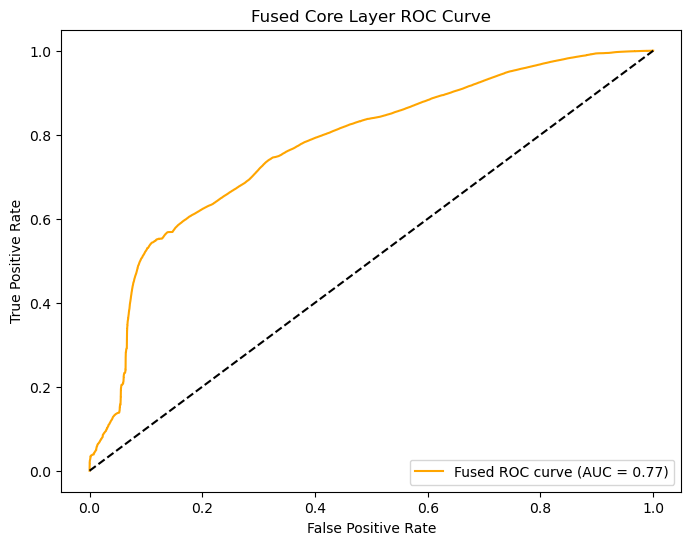


Best Threshold (F1 optimized): 0.10 with F1 Score: 0.6837

False Positives: 415
False Negatives: 158487

Core layer fusion results saved to: /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core/core_layer_results.csv

✅ Inference, Evaluation, and Analysis Complete. Review charts, threshold sweep results, and error analysis for further insights.


In [16]:
import os
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report,
                             accuracy_score, f1_score)

# ----------------------------------------------------------------
# Step 0: Define paths and directories
# ----------------------------------------------------------------
CORE_LAYER_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core"
os.makedirs(CORE_LAYER_DIR, exist_ok=True)

GLOBAL_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Global/xgb_global_model.pkl"
EDGE_MODEL_PATH   = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Edge/LSTM/edge_layer_lstm_best.keras"
DEVICE_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_mlp_model.h5"

# Path to the full processed UNSW dataset with all engineered features (train + test)
UNSW_FEATURE_CSV = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Full_Processed_Master.csv"

# ----------------------------------------------------------------
# Step 1: Load and Prepare UNSW Dataset
# ----------------------------------------------------------------
print("Loading UNSW full processed dataset for inference...")
df = pd.read_csv(UNSW_FEATURE_CSV)

# Ensure binary label exists; if not, create it:
if "binary_label" not in df.columns:
    df["binary_label"] = np.where(df["label"].astype(str).str.lower() == "benign", 0, 1)

# Fill any remaining NaN values with 0 (or choose a different strategy later)
df.fillna(0, inplace=True)
print("Dataset loaded. Shape:", df.shape)

# Ensure the Global features have 23 columns
if "fin_flag_cnt" not in df.columns:
    df["fin_flag_cnt"] = 0.0  # Placeholder value for FIN Flag Count
if "psh_flag_cnt" not in df.columns:
    df["psh_flag_cnt"] = 0.0  # Placeholder value for PSH Flag Count

# ----------------------------------------------------------------
# Step 2: Load Trained Models
# ----------------------------------------------------------------
print("Loading Global model (XGBoost)...")
xgb_global = joblib.load(GLOBAL_MODEL_PATH)
print("Loading Edge model (LSTM)...")
edge_lstm = load_model(EDGE_MODEL_PATH)
print("Loading Device model (MLP)...")
device_mlp = load_model(DEVICE_MODEL_PATH)

# ----------------------------------------------------------------
# Step 3: Generate Predictions from Each Layer
# ----------------------------------------------------------------
# A) GLOBAL LAYER
global_features = [
    "dur", "flow_byts_s", "flow_iat_mean", "flow_iat_std", "flow_iat_max",
    "ct_dst_sport_ltm", "proto", "synack", "ackdat", "fin_flag_cnt", "psh_flag_cnt",
    "pkt_len_min", "pkt_len_max", "fwd_pkts_s", "bwd_pkts_s", "fwd_pkt_len_max", "bwd_pkt_len_min",
    "sbytes", "dbytes", "hour_sin", "hour_cos", "weekday_sin", "weekday_cos"
]
X_global = df[global_features].values
# Use raw features (or apply a saved scaler if required)
y_pred_proba_global = xgb_global.predict_proba(X_global)  # (N, num_classes)
attack_conf_global = 1.0 - y_pred_proba_global[:, 0]  # assuming Benign is at index 0
global_preds = (attack_conf_global >= 0.5).astype(int)

# B) EDGE LAYER (LSTM)
edge_features = [
    "pkt_len_min", "pkt_len_max",
    "fwd_pkt_len_max", "bwd_pkt_len_min",
    "fwd_pkts_s", "bwd_pkts_s",
    "fwd_iat_mean"
]
X_edge = df[edge_features].values
# Apply scaling (replace StandardScaler() with your saved scaler if available)
scaler_edge = StandardScaler()
X_edge_scaled = scaler_edge.fit_transform(X_edge)
sequence_length = 5
num_samples_edge = X_edge_scaled.shape[0] - sequence_length + 1
X_seq_edge = np.array([X_edge_scaled[i:i+sequence_length] for i in range(num_samples_edge)])
edge_proba = edge_lstm.predict(X_seq_edge, batch_size=64)  # (num_samples_edge, num_classes)
attack_conf_edge = 1.0 - edge_proba[:, 0]
# Align edge predictions to original indexing
attack_conf_edge_aligned = np.empty(X_edge.shape[0])
attack_conf_edge_aligned[:sequence_length-1] = np.nan  # first few undefined
attack_conf_edge_aligned[sequence_length-1:] = attack_conf_edge
attack_conf_edge_aligned = np.nan_to_num(attack_conf_edge_aligned, nan=0.0)
edge_preds = (attack_conf_edge_aligned >= 0.5).astype(int)

# C) DEVICE LAYER (MLP)
device_features = [
    "ct_dst_sport_ltm", "fwd_pkt_len_max", "bwd_pkt_len_min", "pkt_len_var",
    "fwd_pkt_len_std", "bwd_pkt_len_std", "dur", "flow_iat_mean", "flow_iat_std",
    "idle_max", "idle_mean", "active_min", "active_max", "init_fwd_win_byts",
    "init_bwd_win_byts", "fwd_hdr_len", "bwd_hdr_len", "pkt_size_avg",
    "fwd_seg_size_avg", "bwd_seg_size_avg", "hour_sin", "hour_cos"
]
X_device = df[device_features].values
scaler_device = StandardScaler()
X_device_scaled = scaler_device.fit_transform(X_device)
device_proba = device_mlp.predict(X_device_scaled, batch_size=64).flatten()  # (N,)
device_preds = (device_proba >= 0.5).astype(int)
attack_conf_device = device_proba

# ----------------------------------------------------------------
# Step 4: Weighted Fusion (Core Layer)
# ----------------------------------------------------------------
attack_conf_global = np.array(attack_conf_global)
attack_conf_edge_aligned = np.array(attack_conf_edge_aligned)
attack_conf_device = np.array(attack_conf_device)

# Define fusion weights (tune these based on performance)
w_global = 0.3
w_edge   = 0.3
w_device = 0.4

fused_score = (w_global * attack_conf_global +
               w_edge   * attack_conf_edge_aligned +
               w_device * attack_conf_device)
# Ensure no NaN remains
fused_score = np.nan_to_num(fused_score, nan=0.0)
fused_label = (fused_score > 0.5).astype(int)

# ----------------------------------------------------------------
# Step 5: Evaluate Core Layer Performance
# ----------------------------------------------------------------
y_true = df["binary_label"].values
assert len(y_true) == len(fused_label), "Mismatch in prediction and ground truth lengths!"

acc_core = accuracy_score(y_true, fused_label)
print(f"Fused Core Layer Accuracy: {acc_core:.4f}")
print("\nFused Core Classification Report:")
print(classification_report(y_true, fused_label, target_names=["Benign", "Attack"]))
cm_core = confusion_matrix(y_true, fused_label)
print("\nFused Core Confusion Matrix:")
print(cm_core)

# Plot ROC curve for fused output
fpr_fused, tpr_fused, _ = roc_curve(y_true, fused_score)
roc_auc_fused = auc(fpr_fused, tpr_fused)
plt.figure(figsize=(8, 6))
plt.plot(fpr_fused, tpr_fused, color='orange', label=f"Fused ROC curve (AUC = {roc_auc_fused:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fused Core Layer ROC Curve")
plt.legend(loc="lower right")
roc_curve_path = os.path.join(CORE_LAYER_DIR, "core_layer_fused_roc.png")
plt.savefig(roc_curve_path)
plt.show()

# ----------------------------------------------------------------
# Step 6: Threshold Sweep (for F1 Optimization)
# ----------------------------------------------------------------
thresholds = np.arange(0.1, 0.91, 0.05)
f1_scores = [f1_score(y_true, (fused_score > t).astype(int)) for t in thresholds]
best_t = thresholds[np.argmax(f1_scores)]
print(f"\nBest Threshold (F1 optimized): {best_t:.2f} with F1 Score: {max(f1_scores):.4f}")

# ----------------------------------------------------------------
# Step 7: False Positive / False Negative Analysis
# ----------------------------------------------------------------
core_results_df = pd.DataFrame({
    "Global_Conf": attack_conf_global,
    "Edge_Conf": attack_conf_edge_aligned,
    "Device_Conf": attack_conf_device,
    "Fused_Score": fused_score,
    "Fused_Label": fused_label,
    "True_Label": y_true
})
fp = core_results_df[(core_results_df["Fused_Label"] == 1) & (core_results_df["True_Label"] == 0)]
fn = core_results_df[(core_results_df["Fused_Label"] == 0) & (core_results_df["True_Label"] == 1)]
print(f"\nFalse Positives: {len(fp)}")
print(f"False Negatives: {len(fn)}")

# ----------------------------------------------------------------
# Step 8: Save Final Core Layer Results to CSV
# ----------------------------------------------------------------
csv_core_path = os.path.join(CORE_LAYER_DIR, "core_layer_results.csv")
core_results_df.to_csv(csv_core_path, index=False)
print(f"\nCore layer fusion results saved to: {csv_core_path}")

print("\n✅ Inference, Evaluation, and Analysis Complete. Review charts, threshold sweep results, and error analysis for further insights.")


Total Attack flows (True): 164673
False Negatives: 158487
True Positives: 6186

=== Statistical Summary: False Negatives ===
                count      mean       std           min           25%  \
Global_Conf  158487.0  0.107750  0.203582  2.384186e-07  7.617474e-05   
Edge_Conf    158487.0  0.358804  0.408939  0.000000e+00  4.695019e-02   
Device_Conf  158487.0  0.088204  0.250473  0.000000e+00  5.110056e-30   
Fused_Score  158487.0  0.175248  0.149357  6.794930e-07  3.638907e-02   
Fused_Label  158487.0  0.000000  0.000000  0.000000e+00  0.000000e+00   
True_Label   158487.0  1.000000  0.000000  1.000000e+00  1.000000e+00   

                      50%       75%       max  
Global_Conf  4.445851e-03  0.105744  0.999242  
Edge_Conf    1.355398e-01  0.980915  1.000000  
Device_Conf  1.057170e-12  0.038000  0.999927  
Fused_Score  1.261015e-01  0.301177  0.499982  
Fused_Label  0.000000e+00  0.000000  0.000000  
True_Label   1.000000e+00  1.000000  1.000000  

=== Statistical Summary: 

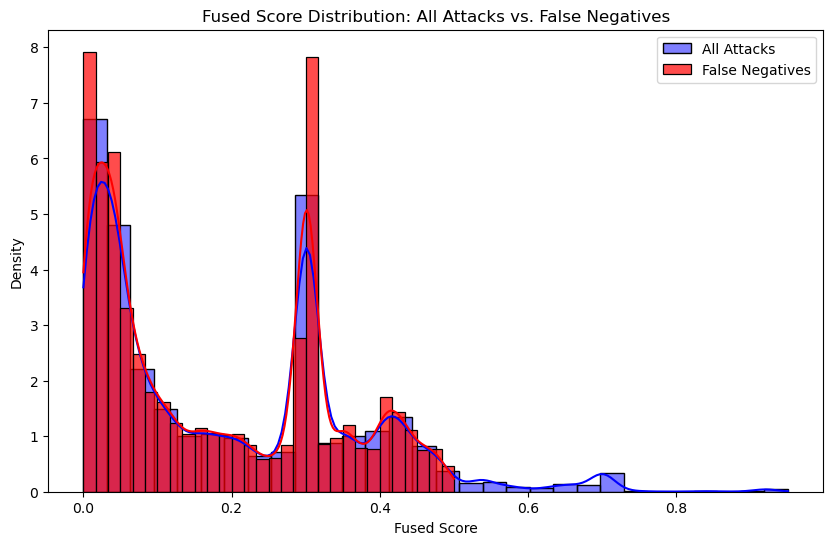


=== Adaptive Override Strategy ===
Number of instances with Device_Conf > 0.9: 19997
Re-evaluating performance with adaptive override...
Adaptive Fused Core Layer Accuracy: 0.4074

Adaptive Fused Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.37      0.95      0.54     93000
      Attack       0.78      0.10      0.18    164673

    accuracy                           0.41    257673
   macro avg       0.58      0.53      0.36    257673
weighted avg       0.63      0.41      0.31    257673


Adaptive Fused Core Confusion Matrix:
[[ 88224   4776]
 [147916  16757]]

Adaptive core layer fusion results saved to: /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core/core_layer_results_adaptive.csv

✅ False Negative Analysis, Distribution Visualization, and Adaptive Override Completed.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step A: Extract False Negatives and True Positives
# -----------------------------
# core_results_df is assumed to contain:
# "Global_Conf", "Edge_Conf", "Device_Conf", "Fused_Score", "Fused_Label", "True_Label"
# with binary True_Label: 1 = Attack, 0 = Benign

# Identify False Negatives (FN): True Label = Attack (1) but predicted as Benign (0)
false_negatives = core_results_df[(core_results_df["Fused_Label"] == 0) & (core_results_df["True_Label"] == 1)]
# Identify True Positives (TP): True Label = Attack (1) and predicted as Attack (1)
true_positives = core_results_df[(core_results_df["Fused_Label"] == 1) & (core_results_df["True_Label"] == 1)]

print(f"\nTotal Attack flows (True): {sum(core_results_df['True_Label'])}")
print(f"False Negatives: {len(false_negatives)}")
print(f"True Positives: {len(true_positives)}")

# -----------------------------
# Step B: Automated Comparison (Statistical Summaries)
# -----------------------------
print("\n=== Statistical Summary: False Negatives ===")
print(false_negatives.describe().T)
print("\n=== Statistical Summary: True Positives ===")
print(true_positives.describe().T)

# -----------------------------
# Step C: Visualize Fused Score Distributions for Attack Flows vs. False Negatives
# -----------------------------
plt.figure(figsize=(10, 6))
# Distribution of fused scores for all Attack flows in the dataset
sns.histplot(core_results_df[core_results_df['True_Label'] == 1]['Fused_Score'], 
             label="All Attacks", color="blue", kde=True, stat="density", bins=30)
# Distribution of fused scores for False Negatives
sns.histplot(false_negatives['Fused_Score'], 
             label="False Negatives", color="red", kde=True, stat="density", bins=30, alpha=0.7)
plt.title("Fused Score Distribution: All Attacks vs. False Negatives")
plt.xlabel("Fused Score")
plt.ylabel("Density")
plt.legend()
plt.show()

# -----------------------------
# Step D: Optional Adaptive Override Strategy
# -----------------------------
# Example patch: if device layer is very confident (e.g., device_proba > 0.9), override fused decision to Attack
# (This is a sample strategy—you can tune the threshold as needed.)
device_override_threshold = 0.9
fused_label_adaptive = fused_label.copy()  # original fused_label from your main inference block
override_indices = np.where(attack_conf_device > device_override_threshold)[0]
fused_label_adaptive[override_indices] = 1

print("\n=== Adaptive Override Strategy ===")
print(f"Number of instances with Device_Conf > {device_override_threshold}: {len(override_indices)}")
print("Re-evaluating performance with adaptive override...")

acc_core_adaptive = accuracy_score(y_true, fused_label_adaptive)
print(f"Adaptive Fused Core Layer Accuracy: {acc_core_adaptive:.4f}")
print("\nAdaptive Fused Core Classification Report:")
print(classification_report(y_true, fused_label_adaptive, target_names=["Benign", "Attack"]))
cm_core_adaptive = confusion_matrix(y_true, fused_label_adaptive)
print("\nAdaptive Fused Core Confusion Matrix:")
print(cm_core_adaptive)

# -----------------------------
# (Optional) Save new adaptive results (if desired)
# -----------------------------
core_results_df["Fused_Label_Adaptive"] = fused_label_adaptive
adaptive_csv_path = os.path.join(CORE_LAYER_DIR, "core_layer_results_adaptive.csv")
core_results_df.to_csv(adaptive_csv_path, index=False)
print(f"\nAdaptive core layer fusion results saved to: {adaptive_csv_path}")

print("\n✅ False Negative Analysis, Distribution Visualization, and Adaptive Override Completed.")

Object `this` not found.
Loading UNSW full processed dataset for inference...


Dataset loaded. Shape: (257673, 79)
Loading Global model (XGBoost)...
Loading Edge model (LSTM)...
Loading Device model (MLP)...
4027/4027 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4027/4027 ━━━━━━━━━━━━━━━━━━━━ 1s 162us/step

Logistic Fusion Model F1 Score on Validation Set: 0.7809
Logistic Fusion Core Accuracy: 0.7254

Logistic Fusion Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.61      0.67      0.64     93000
      Attack       0.80      0.76      0.78    164673

    accuracy                           0.73    257673
   macro avg       0.71      0.71      0.71    257673
weighted avg       0.73      0.73      0.73    257673


Logistic Fusion Core Confusion Matrix:
[[ 62186  30814]
 [ 39945 124728]]

Combined Override Core Accuracy: 0.6700

Combined Override Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.53      0.87      0.66     93000
      Attack       0.88      0.56      0.68

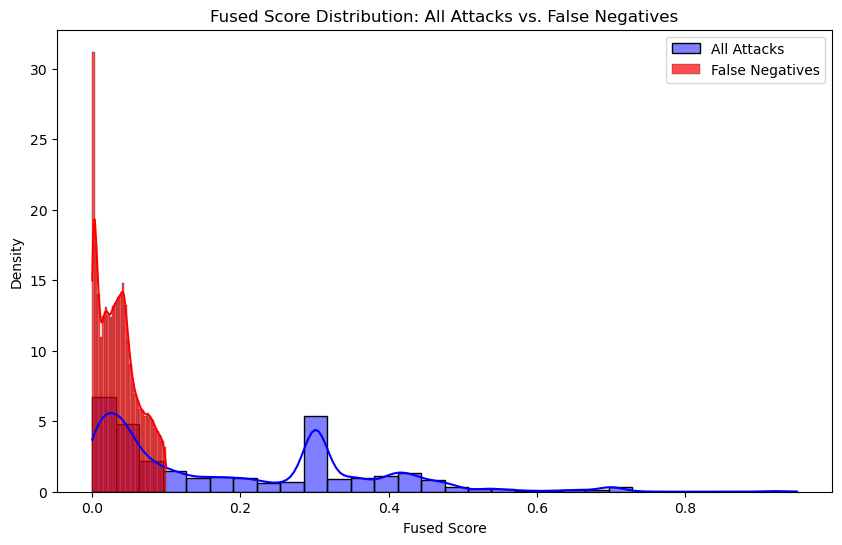


Core layer fusion (logistic regression) results saved to: /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core/core_layer_results_logistic_fusion.csv

✅ Advanced Fusion, Adaptive Override, and Error Analysis Completed.


In [20]:
Should I run this?


import os
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report,
                             accuracy_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ----------------------------------------------------------------
# Step 0: Define paths and directories (as before)
# ----------------------------------------------------------------
CORE_LAYER_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core"
os.makedirs(CORE_LAYER_DIR, exist_ok=True)

GLOBAL_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Global/xgb_global_model.pkl"
EDGE_MODEL_PATH   = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Edge/LSTM/edge_layer_lstm_best.keras"
DEVICE_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_mlp_model.h5"
UNSW_FEATURE_CSV = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Full_Processed_Master.csv"

# ----------------------------------------------------------------
# Step 1: Load and Prepare UNSW Dataset
# ----------------------------------------------------------------
print("Loading UNSW full processed dataset for inference...")
df = pd.read_csv(UNSW_FEATURE_CSV)
if "binary_label" not in df.columns:
    df["binary_label"] = np.where(df["label"].astype(str).str.lower() == "benign", 0, 1)
df.fillna(0, inplace=True)
print("Dataset loaded. Shape:", df.shape)

if "fin_flag_cnt" not in df.columns:
    df["fin_flag_cnt"] = 0.0
if "psh_flag_cnt" not in df.columns:
    df["psh_flag_cnt"] = 0.0

# ----------------------------------------------------------------
# Step 2: Load Trained Models (as before)
# ----------------------------------------------------------------
print("Loading Global model (XGBoost)...")
xgb_global = joblib.load(GLOBAL_MODEL_PATH)
print("Loading Edge model (LSTM)...")
edge_lstm = load_model(EDGE_MODEL_PATH)
print("Loading Device model (MLP)...")
device_mlp = load_model(DEVICE_MODEL_PATH)

# ----------------------------------------------------------------
# Step 3: Generate Predictions for Each Layer (same as before)
# ----------------------------------------------------------------
# --- GLOBAL LAYER ---
global_features = [
    "dur", "flow_byts_s", "flow_iat_mean", "flow_iat_std", "flow_iat_max",
    "ct_dst_sport_ltm", "proto", "synack", "ackdat", "fin_flag_cnt", "psh_flag_cnt",
    "pkt_len_min", "pkt_len_max", "fwd_pkts_s", "bwd_pkts_s", "fwd_pkt_len_max", "bwd_pkt_len_min",
    "sbytes", "dbytes", "hour_sin", "hour_cos", "weekday_sin", "weekday_cos"
]
X_global = df[global_features].values
y_pred_proba_global = xgb_global.predict_proba(X_global)
attack_conf_global = 1.0 - y_pred_proba_global[:, 0]
global_preds = (attack_conf_global >= 0.5).astype(int)

# --- EDGE LAYER (LSTM) ---
edge_features = [
    "pkt_len_min", "pkt_len_max",
    "fwd_pkt_len_max", "bwd_pkt_len_min",
    "fwd_pkts_s", "bwd_pkts_s",
    "fwd_iat_mean"
]
X_edge = df[edge_features].values
scaler_edge = StandardScaler()
X_edge_scaled = scaler_edge.fit_transform(X_edge)
sequence_length = 5
num_samples_edge = X_edge_scaled.shape[0] - sequence_length + 1
X_seq_edge = np.array([X_edge_scaled[i:i+sequence_length] for i in range(num_samples_edge)])
edge_proba = edge_lstm.predict(X_seq_edge, batch_size=64)
attack_conf_edge = 1.0 - edge_proba[:, 0]
attack_conf_edge_aligned = np.empty(X_edge.shape[0])
attack_conf_edge_aligned[:sequence_length-1] = np.nan
attack_conf_edge_aligned[sequence_length-1:] = attack_conf_edge
attack_conf_edge_aligned = np.nan_to_num(attack_conf_edge_aligned, nan=0.0)
edge_preds = (attack_conf_edge_aligned >= 0.5).astype(int)

# --- DEVICE LAYER (MLP) ---
device_features = [
    "ct_dst_sport_ltm", "fwd_pkt_len_max", "bwd_pkt_len_min", "pkt_len_var",
    "fwd_pkt_len_std", "bwd_pkt_len_std", "dur", "flow_iat_mean", "flow_iat_std",
    "idle_max", "idle_mean", "active_min", "active_max", "init_fwd_win_byts",
    "init_bwd_win_byts", "fwd_hdr_len", "bwd_hdr_len", "pkt_size_avg",
    "fwd_seg_size_avg", "bwd_seg_size_avg", "hour_sin", "hour_cos"
]
X_device = df[device_features].values
scaler_device = StandardScaler()
X_device_scaled = scaler_device.fit_transform(X_device)
device_proba = device_mlp.predict(X_device_scaled, batch_size=64).flatten()
device_preds = (device_proba >= 0.5).astype(int)
attack_conf_device = device_proba

# --- FUSION (Core Layer) ---
attack_conf_global = np.array(attack_conf_global)
attack_conf_edge_aligned = np.array(attack_conf_edge_aligned)
attack_conf_device = np.array(attack_conf_device)
# Use current fusion weights (for comparison purposes)
w_global = 0.3
w_edge   = 0.3
w_device = 0.4
fused_score = (w_global * attack_conf_global +
               w_edge * attack_conf_edge_aligned +
               w_device * attack_conf_device)
fused_score = np.nan_to_num(fused_score, nan=0.0)
# Initially use threshold=0.10 (as determined previously)
best_threshold = 0.10
fused_label_best = (fused_score > best_threshold).astype(int)

# Add fusion outputs to a core results DataFrame
core_results_df = pd.DataFrame({
    "Global_Conf": attack_conf_global,
    "Edge_Conf": attack_conf_edge_aligned,
    "Device_Conf": attack_conf_device,
    "Fused_Score": fused_score,
    "Fused_Label": fused_label_best,
    "True_Label": df["binary_label"].values
})

# ----------------------------------------------------------------
# Step 4: Train Logistic Regression for Learned Fusion
# ----------------------------------------------------------------
# Use a subset of data (for instance, 20% of samples) to learn the optimal fusion weights
X_fusion = core_results_df[["Global_Conf", "Edge_Conf", "Device_Conf"]].values
y_fusion = core_results_df["True_Label"].values

X_train, X_val, y_train, y_val = train_test_split(X_fusion, y_fusion, test_size=0.3, random_state=42)
lr_core = LogisticRegression()
lr_core.fit(X_train, y_train)

# Evaluate on the validation set
lr_preds = lr_core.predict(X_val)
lr_proba = lr_core.predict_proba(X_val)[:, 1]
f1_lr = f1_score(y_val, lr_preds)
print(f"\nLogistic Fusion Model F1 Score on Validation Set: {f1_lr:.4f}")

# Apply logistic fusion on the entire core results (to get new fused scores)
fused_score_lr = lr_core.predict_proba(X_fusion)[:, 1]
fused_label_lr = (fused_score_lr > 0.5).astype(int)

# Evaluate logistic fusion performance
acc_lr = accuracy_score(y_fusion, fused_label_lr)
print(f"Logistic Fusion Core Accuracy: {acc_lr:.4f}")
print("\nLogistic Fusion Core Classification Report:")
print(classification_report(y_fusion, fused_label_lr, target_names=["Benign", "Attack"]))
cm_lr = confusion_matrix(y_fusion, fused_label_lr)
print("\nLogistic Fusion Core Confusion Matrix:")
print(cm_lr)

# ----------------------------------------------------------------
# Optional: Combined Override Strategy
# ----------------------------------------------------------------
device_override = (attack_conf_device > 0.90)
edge_override   = (attack_conf_edge_aligned > 0.90)
combined_override = device_override | edge_override

fused_label_combined = fused_label_best.copy()
fused_label_combined[combined_override] = 1

acc_override = accuracy_score(y_fusion, fused_label_combined)
print(f"\nCombined Override Core Accuracy: {acc_override:.4f}")
print("\nCombined Override Core Classification Report:")
print(classification_report(y_fusion, fused_label_combined, target_names=["Benign", "Attack"]))
cm_override = confusion_matrix(y_fusion, fused_label_combined)
print("\nCombined Override Core Confusion Matrix:")
print(cm_override)

# ----------------------------------------------------------------
# Visualization: Fused Score Distribution (Attacks vs False Negatives)
# ----------------------------------------------------------------
plt.figure(figsize=(10,6))
sns.histplot(core_results_df[core_results_df['True_Label'] == 1]['Fused_Score'], label="All Attacks", color="blue", kde=True, stat="density", bins=30)
sns.histplot(core_results_df[(core_results_df['True_Label'] == 1) & (core_results_df['Fused_Label'] == 0)]['Fused_Score'], label="False Negatives", color="red", kde=True, stat="density", bins=30, alpha=0.7)
plt.title("Fused Score Distribution: All Attacks vs. False Negatives")
plt.xlabel("Fused Score")
plt.ylabel("Density")
plt.legend()
plt.show()

# ----------------------------------------------------------------
# Save final results
# ----------------------------------------------------------------
csv_core_path = os.path.join(CORE_LAYER_DIR, "core_layer_results_logistic_fusion.csv")
core_results_df["Fused_Label_LR"] = fused_label_lr
core_results_df.to_csv(csv_core_path, index=False)
print(f"\nCore layer fusion (logistic regression) results saved to: {csv_core_path}")

print("\n✅ Advanced Fusion, Adaptive Override, and Error Analysis Completed.")

In [22]:
print("Learned Weights:", lr_core.coef_)
print("Intercept:", lr_core.intercept_)

Learned Weights: [[3.41186712 4.11956837 1.01031148]]
Intercept: [-0.43286917]


In [24]:
thresholds = np.arange(0.1, 0.91, 0.05)
f1s = [f1_score(y_fusion, (fused_score_lr > t).astype(int)) for t in thresholds]
best_t = thresholds[np.argmax(f1s)]
print(f"Best Threshold on Logistic Fusion: {best_t}")

Best Threshold on Logistic Fusion: 0.40000000000000013


Loading UNSW full processed dataset for inference...


Dataset loaded. Shape: (257673, 79)
Loading Global model (XGBoost)...
Loading Edge model (LSTM)...
Loading Device model (MLP)...
4027/4027 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4027/4027 ━━━━━━━━━━━━━━━━━━━━ 1s 179us/step

Logistic Fusion Model F1 Score on Validation Set: 0.7809
Logistic Fusion Core Accuracy: 0.7254

Logistic Fusion Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.61      0.67      0.64     93000
      Attack       0.80      0.76      0.78    164673

    accuracy                           0.73    257673
   macro avg       0.71      0.71      0.71    257673
weighted avg       0.73      0.73      0.73    257673


Logistic Fusion Core Confusion Matrix:
[[ 62186  30814]
 [ 39945 124728]]

Best Threshold on Logistic Fusion: 0.39999999999999986


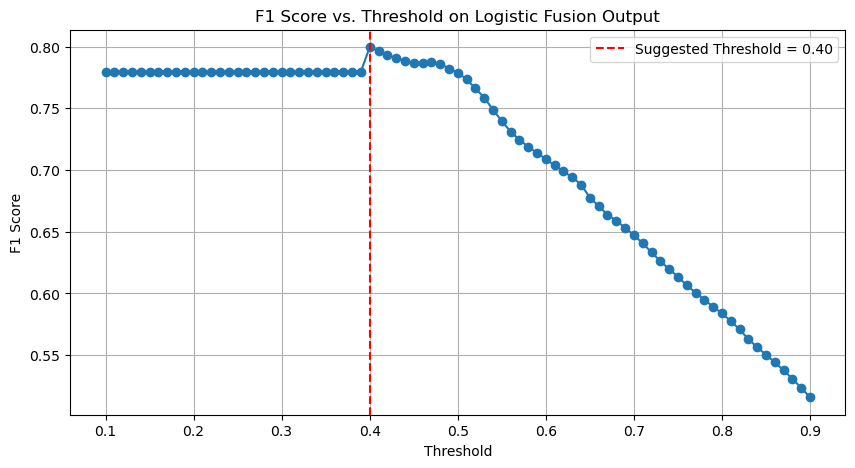

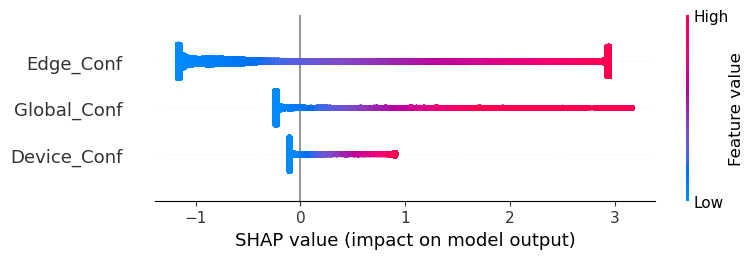

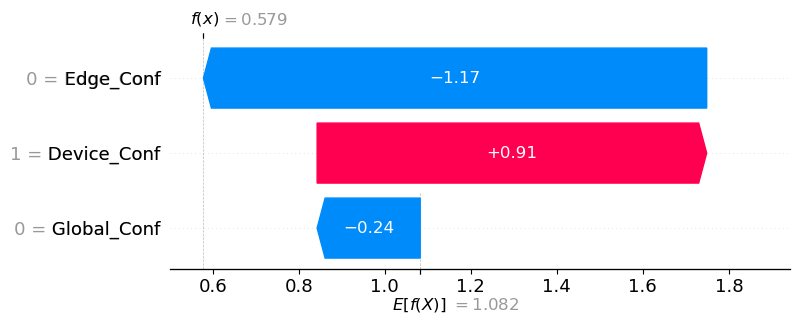


Combined Override Strategy Evaluation:
Combined Override Core Accuracy: 0.6700
Combined Override Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.53      0.87      0.66     93000
      Attack       0.88      0.56      0.68    164673

    accuracy                           0.67    257673
   macro avg       0.70      0.71      0.67    257673
weighted avg       0.75      0.67      0.67    257673

Combined Override Core Confusion Matrix:
[[80757 12243]
 [72785 91888]]

Core layer fusion (logistic regression) results saved to: /Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core/core_layer_results_logistic_fusion.csv

✅ Advanced Fusion, SHAP Analysis, Threshold Sensitivity, and Error Analysis Completed.


In [32]:
import os
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report,
                             accuracy_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import shap

# =================================================================
# Paths & Directories (Update as needed)
# =================================================================
CORE_LAYER_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core"
os.makedirs(CORE_LAYER_DIR, exist_ok=True)

GLOBAL_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Global/xgb_global_model.pkl"
EDGE_MODEL_PATH   = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Edge/LSTM/edge_layer_lstm_best.keras"
DEVICE_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_mlp_model.h5"

UNSW_FEATURE_CSV = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Full_Processed_Master.csv"

# =================================================================
# STEP 1: Load & Prepare UNSW Dataset for Inference
# =================================================================
print("Loading UNSW full processed dataset for inference...")
df = pd.read_csv(UNSW_FEATURE_CSV)

# Ensure binary label exists; if not, create it
if "binary_label" not in df.columns:
    df["binary_label"] = np.where(df["label"].astype(str).str.lower() == "benign", 0, 1)
# Fill NaNs with 0 (adjust as needed)
df.fillna(0, inplace=True)
print("Dataset loaded. Shape:", df.shape)

# Global layer requires 23 features; add missing FIN/PSH flag columns if needed
if "fin_flag_cnt" not in df.columns:
    df["fin_flag_cnt"] = 0.0  # Placeholder value for FIN Flag Count
if "psh_flag_cnt" not in df.columns:
    df["psh_flag_cnt"] = 0.0  # Placeholder value for PSH Flag Count

# =================================================================
# STEP 2: Load Trained Models
# =================================================================
print("Loading Global model (XGBoost)...")
xgb_global = joblib.load(GLOBAL_MODEL_PATH)
print("Loading Edge model (LSTM)...")
edge_lstm = load_model(EDGE_MODEL_PATH)
print("Loading Device model (MLP)...")
device_mlp = load_model(DEVICE_MODEL_PATH)

# =================================================================
# STEP 3: Layer-wise Predictions and Fusion (Core Layer)
# =================================================================

# --- GLOBAL LAYER ---
global_features = [
    "dur", "flow_byts_s", "flow_iat_mean", "flow_iat_std", "flow_iat_max",
    "ct_dst_sport_ltm", "proto", "synack", "ackdat", "fin_flag_cnt", "psh_flag_cnt",
    "pkt_len_min", "pkt_len_max", "fwd_pkts_s", "bwd_pkts_s", "fwd_pkt_len_max", "bwd_pkt_len_min",
    "sbytes", "dbytes", "hour_sin", "hour_cos", "weekday_sin", "weekday_cos"
]
X_global = df[global_features].values
y_pred_proba_global = xgb_global.predict_proba(X_global)
# Assuming benign is class 0:
attack_conf_global = 1.0 - y_pred_proba_global[:, 0]
global_preds = (attack_conf_global >= 0.5).astype(int)

# --- EDGE LAYER (LSTM) ---
edge_features = [
    "pkt_len_min", "pkt_len_max",
    "fwd_pkt_len_max", "bwd_pkt_len_min",
    "fwd_pkts_s", "bwd_pkts_s",
    "fwd_iat_mean"
]
X_edge = df[edge_features].values
scaler_edge = StandardScaler()
X_edge_scaled = scaler_edge.fit_transform(X_edge)
sequence_length = 5
num_samples_edge = X_edge_scaled.shape[0] - sequence_length + 1
X_seq_edge = np.array([X_edge_scaled[i:i+sequence_length] for i in range(num_samples_edge)])
edge_proba = edge_lstm.predict(X_seq_edge, batch_size=64)
attack_conf_edge = 1.0 - edge_proba[:, 0]
attack_conf_edge_aligned = np.empty(X_edge.shape[0])
attack_conf_edge_aligned[:sequence_length-1] = np.nan  # first few entries undefined
attack_conf_edge_aligned[sequence_length-1:] = attack_conf_edge
attack_conf_edge_aligned = np.nan_to_num(attack_conf_edge_aligned, nan=0.0)
edge_preds = (attack_conf_edge_aligned >= 0.5).astype(int)

# --- DEVICE LAYER (MLP) ---
device_features = [
    "ct_dst_sport_ltm", "fwd_pkt_len_max", "bwd_pkt_len_min", "pkt_len_var",
    "fwd_pkt_len_std", "bwd_pkt_len_std", "dur", "flow_iat_mean", "flow_iat_std",
    "idle_max", "idle_mean", "active_min", "active_max", "init_fwd_win_byts",
    "init_bwd_win_byts", "fwd_hdr_len", "bwd_hdr_len", "pkt_size_avg",
    "fwd_seg_size_avg", "bwd_seg_size_avg", "hour_sin", "hour_cos"
]
X_device = df[device_features].values
scaler_device = StandardScaler()
X_device_scaled = scaler_device.fit_transform(X_device)
device_proba = device_mlp.predict(X_device_scaled, batch_size=64).flatten()
device_preds = (device_proba >= 0.5).astype(int)
attack_conf_device = device_proba

# --- FUSION (Core Layer) ---
attack_conf_global = np.array(attack_conf_global)
attack_conf_edge_aligned = np.array(attack_conf_edge_aligned)
attack_conf_device = np.array(attack_conf_device)

# Use initial fusion weights (Global=0.3, Edge=0.3, Device=0.4)
w_global = 0.3
w_edge   = 0.3
w_device = 0.4
fused_score = (w_global * attack_conf_global +
               w_edge * attack_conf_edge_aligned +
               w_device * attack_conf_device)
fused_score = np.nan_to_num(fused_score, nan=0.0)
# Use initial best threshold (0.10, as determined previously)
best_threshold = 0.10
fused_label_best = (fused_score > best_threshold).astype(int)

core_results_df = pd.DataFrame({
    "Global_Conf": attack_conf_global,
    "Edge_Conf": attack_conf_edge_aligned,
    "Device_Conf": attack_conf_device,
    "Fused_Score": fused_score,
    "Fused_Label": fused_label_best,
    "True_Label": df["binary_label"].values
})

# =================================================================
# STEP 4: Logistic Fusion - Learn Core Fusion using Logistic Regression
# =================================================================
X_fusion = core_results_df[["Global_Conf", "Edge_Conf", "Device_Conf"]].values
y_fusion = core_results_df["True_Label"].values

X_train, X_val, y_train, y_val = train_test_split(X_fusion, y_fusion, test_size=0.3, random_state=42)
lr_core = LogisticRegression()
lr_core.fit(X_train, y_train)

lr_preds = lr_core.predict(X_val)
lr_proba = lr_core.predict_proba(X_val)[:, 1]
f1_lr = f1_score(y_val, lr_preds)
print(f"\nLogistic Fusion Model F1 Score on Validation Set: {f1_lr:.4f}")

fused_score_lr = lr_core.predict_proba(X_fusion)[:, 1]
fused_label_lr = (fused_score_lr > 0.5).astype(int)

print(f"Logistic Fusion Core Accuracy: {accuracy_score(y_fusion, fused_label_lr):.4f}")
print("\nLogistic Fusion Core Classification Report:")
print(classification_report(y_fusion, fused_label_lr, target_names=["Benign", "Attack"]))
print("\nLogistic Fusion Core Confusion Matrix:")
print(confusion_matrix(y_fusion, fused_label_lr))

# =================================================================
# STEP 5: Threshold Sensitivity Plot on Logistic Fusion Output
# =================================================================
thresholds = np.arange(0.1, 0.91, 0.01)
f1_scores = [f1_score(y_fusion, (fused_score_lr > t).astype(int)) for t in thresholds]
best_t = thresholds[np.argmax(f1_scores)]
print(f"\nBest Threshold on Logistic Fusion: {best_t}")

plt.figure(figsize=(10,5))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=0.40, color='r', linestyle='--', label='Suggested Threshold = 0.40')
plt.title("F1 Score vs. Threshold on Logistic Fusion Output")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()

# =================================================================
# STEP 6: SHAP Analysis for the Logistic Fusion Model
# =================================================================
explainer = shap.Explainer(lr_core, X_fusion, feature_names=["Global_Conf", "Edge_Conf", "Device_Conf"])
shap_values = explainer(X_fusion)

# Global SHAP summary plot (global feature importance)
shap.summary_plot(shap_values, features=X_fusion, feature_names=["Global_Conf", "Edge_Conf", "Device_Conf"])

# Force plot and Waterfall plot for a single instance (e.g., sample index 12345)
row_idx = 12345
shap.initjs()
# New API force plot (recommended if available)
shap.plots.force(shap_values[row_idx])
# Alternatively, use a waterfall plot for a detailed breakdown:
shap.plots.waterfall(shap_values[row_idx])

# =================================================================
# STEP 7: (Optional) Combined Override Strategy
# =================================================================
device_override = (attack_conf_device > 0.90)
edge_override   = (attack_conf_edge_aligned > 0.90)
combined_override = device_override | edge_override

fused_label_combined = fused_label_best.copy()
fused_label_combined[combined_override] = 1

print("\nCombined Override Strategy Evaluation:")
acc_override = accuracy_score(y_fusion, fused_label_combined)
print(f"Combined Override Core Accuracy: {acc_override:.4f}")
print("Combined Override Core Classification Report:")
print(classification_report(y_fusion, fused_label_combined, target_names=["Benign", "Attack"]))
print("Combined Override Core Confusion Matrix:")
print(confusion_matrix(y_fusion, fused_label_combined))

# =================================================================
# STEP 8: Save Final Results to CSV
# =================================================================
core_results_df["Fused_Label_LR"] = fused_label_lr
core_results_df["Fused_Label_Override"] = fused_label_combined
csv_core_path = os.path.join(CORE_LAYER_DIR, "core_layer_results_logistic_fusion.csv")
core_results_df.to_csv(csv_core_path, index=False)
print(f"\nCore layer fusion (logistic regression) results saved to: {csv_core_path}")

print("\n✅ Advanced Fusion, SHAP Analysis, Threshold Sensitivity, and Error Analysis Completed.")

✅ 'attack_cat' column found.

🎯 Analyzing Attack Category: Fuzzers
Total samples in 'Fuzzers': 24246

Classification Report for Fuzzers
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00         0
      Attack       1.00      0.58      0.74     24246

    accuracy                           0.58     24246
   macro avg       0.50      0.29      0.37     24246
weighted avg       1.00      0.58      0.74     24246



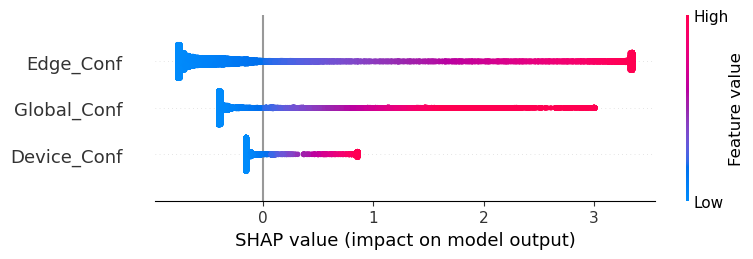

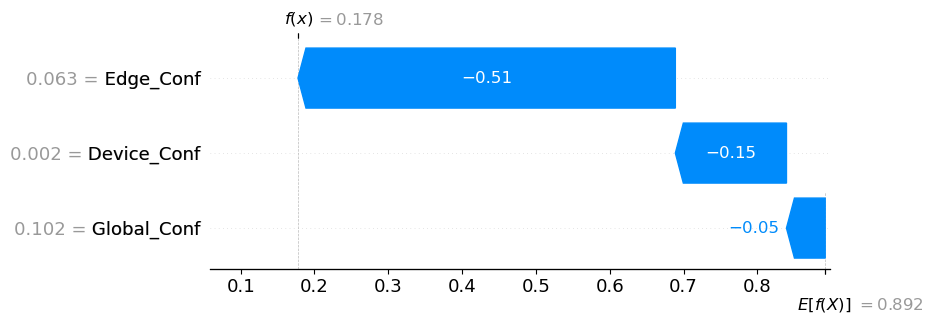

In [34]:
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Ensure that the "attack_cat" column is in your original dataset and that it has been merged into core_results_df
if "attack_cat" in df.columns:
    print("✅ 'attack_cat' column found.")
    # Merge the attack category information into core_results_df (if not already done)
    core_results_df["attack_cat"] = df["attack_cat"]
    
    # Define your weak category (adjust as needed)
    weak_category = "Fuzzers"  # Example: "Fuzzers"; change this string to any valid category present
    
    # Filter for samples in the weak category
    weak_df = core_results_df[core_results_df["attack_cat"] == weak_category]
    print(f"\n🎯 Analyzing Attack Category: {weak_category}")
    print(f"Total samples in '{weak_category}': {len(weak_df)}")
    
    # Optionally, print a per-category classification report if binary predictions exist
    print("\nClassification Report for", weak_category)
    print(classification_report(weak_df["True_Label"], weak_df["Fused_Label_LR"], target_names=["Benign", "Attack"], zero_division=0))
    
    # --- SHAP Analysis Setup ---
    # We assume that 'lr_core' is your trained logistic regression fusion model 
    # and that X_fusion (the fusion input features) and shap_values have been computed.
    # (These were computed earlier as part of logistic fusion.)
    
    # For clarity, we'll filter the fusion input features for the weak category:
    X_fusion_weak = X_fusion[core_results_df["attack_cat"] == weak_category]
    
    # Compute SHAP values for the weak category if not already computed for the full set.
    # (You might reuse your full set 'shap_values' if you desire; here, we'll recompute for clarity.)
    explainer_weak = shap.Explainer(lr_core, X_fusion_weak, feature_names=["Global_Conf", "Edge_Conf", "Device_Conf"])
    shap_values_weak = explainer_weak(X_fusion_weak)
    
    # --- Global SHAP Summary Plot for Weak Category ---
    shap.summary_plot(shap_values_weak, features=X_fusion_weak, feature_names=["Global_Conf", "Edge_Conf", "Device_Conf"])
    
    # --- Force/Waterfall Plot for a Single Sample in the Weak Category ---
    # Choose a representative sample, e.g., the first sample or one with a low Fused_Score (false negative)
    sample_idx = X_fusion_weak.shape[0] // 2  # choose the middle sample; adjust as desired
    
    # Display a force plot using the new SHAP API.
    shap.initjs()
    shap.plots.force(shap_values_weak[sample_idx])
    
    # Alternatively, display a waterfall plot for a detailed breakdown of the sample's prediction.
    shap.plots.waterfall(shap_values_weak[sample_idx])
    
else:
    print("❌ 'attack_cat' column not found in dataset. Please verify your UNSW file or preprocessing pipeline.")

In [36]:
print("Unique attack categories in the dataset:")
print(df["attack_cat"].value_counts())

Unique attack categories in the dataset:
attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_16967/1371011410.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_per_cat.keys()), y=list(f1_per_cat.values()), palette="viridis")


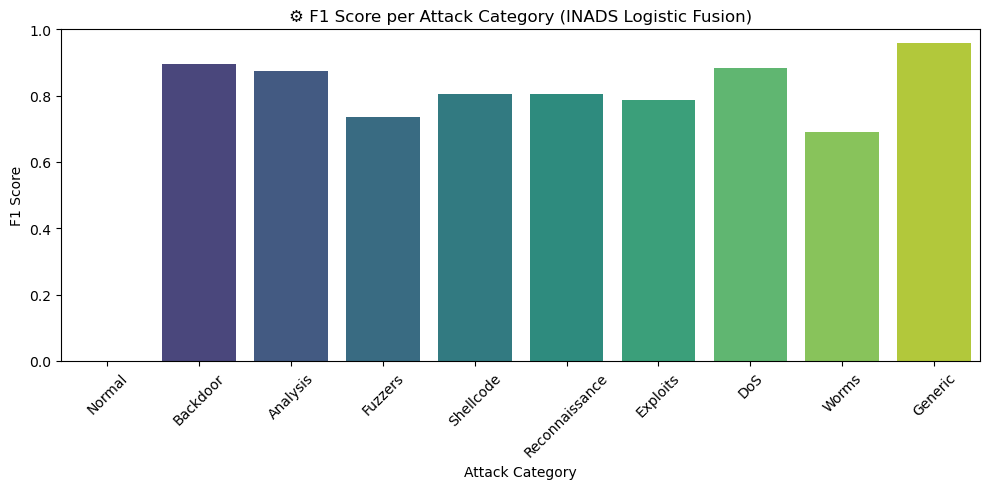

In [38]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the 'attack_cat' column is part of your core_results_df.
# (It should already be merged from your original dataset.)
if "attack_cat" in core_results_df.columns:
    # Calculate F1 score per attack category
    f1_per_cat = {}
    for cat in core_results_df["attack_cat"].unique():
        mask = core_results_df["attack_cat"] == cat
        y_true = core_results_df.loc[mask, "True_Label"]
        y_pred = core_results_df.loc[mask, "Fused_Label_LR"]
        f1_per_cat[cat] = f1_score(y_true, y_pred, zero_division=0)

    # Plot the F1 scores across attack categories
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(f1_per_cat.keys()), y=list(f1_per_cat.values()), palette="viridis")
    plt.title("⚙️ F1 Score per Attack Category (INADS Logistic Fusion)")
    plt.xlabel("Attack Category")
    plt.ylabel("F1 Score")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    print("❌ 'attack_cat' column not found in core_results_df. Please check your preprocessing.")

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure the core_results_df has the required columns: "attack_cat", "Fused_Label_LR", "Edge_Conf", "Device_Conf", and "True_Label".
# We'll create a new column "Fused_Label_Override" based on the logistic fusion label, then override for Fuzzers.
core_results_df["Fused_Label_Override"] = core_results_df["Fused_Label_LR"].copy()

# Apply the Fuzzers override logic:
# If the attack category is "Fuzzers" and either Edge_Conf > 0.7 or Device_Conf > 0.6,
# force the final label to be Attack (1).
override_mask = (core_results_df["attack_cat"] == "Fuzzers") & (
    (core_results_df["Edge_Conf"] > 0.7) | (core_results_df["Device_Conf"] > 0.6)
)
num_overridden = override_mask.sum()
print(f"\nOverride applied to {num_overridden} Fuzzers samples.")

core_results_df.loc[override_mask, "Fused_Label_Override"] = 1

# Evaluate performance using the overridden predictions
accuracy_override = accuracy_score(core_results_df["True_Label"], core_results_df["Fused_Label_Override"])
print(f"\nOverridden Fused Core Accuracy: {accuracy_override:.4f}")

print("\nOverridden Fused Core Classification Report:")
print(classification_report(core_results_df["True_Label"], core_results_df["Fused_Label_Override"], target_names=["Benign", "Attack"], zero_division=0))

print("\nOverridden Fused Core Confusion Matrix:")
print(confusion_matrix(core_results_df["True_Label"], core_results_df["Fused_Label_Override"]))


Override applied to 5740 Fuzzers samples.

Overridden Fused Core Accuracy: 0.7254

Overridden Fused Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.61      0.67      0.64     93000
      Attack       0.80      0.76      0.78    164673

    accuracy                           0.73    257673
   macro avg       0.71      0.71      0.71    257673
weighted avg       0.73      0.73      0.73    257673


Overridden Fused Core Confusion Matrix:
[[ 62186  30814]
 [ 39945 124728]]


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Ensure "attack_cat" is in core_results_df (it should be merged from your original dataset)
if "attack_cat" not in core_results_df.columns and "attack_cat" in df.columns:
    core_results_df["attack_cat"] = df["attack_cat"]

# Option A: Evaluate Fuzzers Performance Before vs. After Override

# Filter Fuzzers: We assume the category name for fuzzers is "Fuzzers"
fuzzers_df = core_results_df[core_results_df["attack_cat"] == "Fuzzers"].copy()

print("Fuzzers samples count:", len(fuzzers_df))

# Classification Report before override
print("\nClassification Report for Fuzzers (Before Override - Fused_Label_LR):")
print(classification_report(fuzzers_df["True_Label"], fuzzers_df["Fused_Label_LR"],
                            target_names=["Benign", "Attack"], zero_division=0))

# Classification Report after override
print("\nClassification Report for Fuzzers (After Override - Fused_Label_Override):")
print(classification_report(fuzzers_df["True_Label"], fuzzers_df["Fused_Label_Override"],
                            target_names=["Benign", "Attack"], zero_division=0))

# Confusion Matrix before override
print("\nConfusion Matrix for Fuzzers (Before Override):")
print(confusion_matrix(fuzzers_df["True_Label"], fuzzers_df["Fused_Label_LR"]))

# Confusion Matrix after override
print("\nConfusion Matrix for Fuzzers (After Override):")
print(confusion_matrix(fuzzers_df["True_Label"], fuzzers_df["Fused_Label_Override"]))

Fuzzers samples count: 24246

Classification Report for Fuzzers (Before Override - Fused_Label_LR):
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00         0
      Attack       1.00      0.58      0.74     24246

    accuracy                           0.58     24246
   macro avg       0.50      0.29      0.37     24246
weighted avg       1.00      0.58      0.74     24246


Classification Report for Fuzzers (After Override - Fused_Label_Override):
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00         0
      Attack       1.00      0.58      0.74     24246

    accuracy                           0.58     24246
   macro avg       0.50      0.29      0.37     24246
weighted avg       1.00      0.58      0.74     24246


Confusion Matrix for Fuzzers (Before Override):
[[    0     0]
 [10143 14103]]

Confusion Matrix for Fuzzers (After Override):
[[    0     0]
 [10143 14103]]


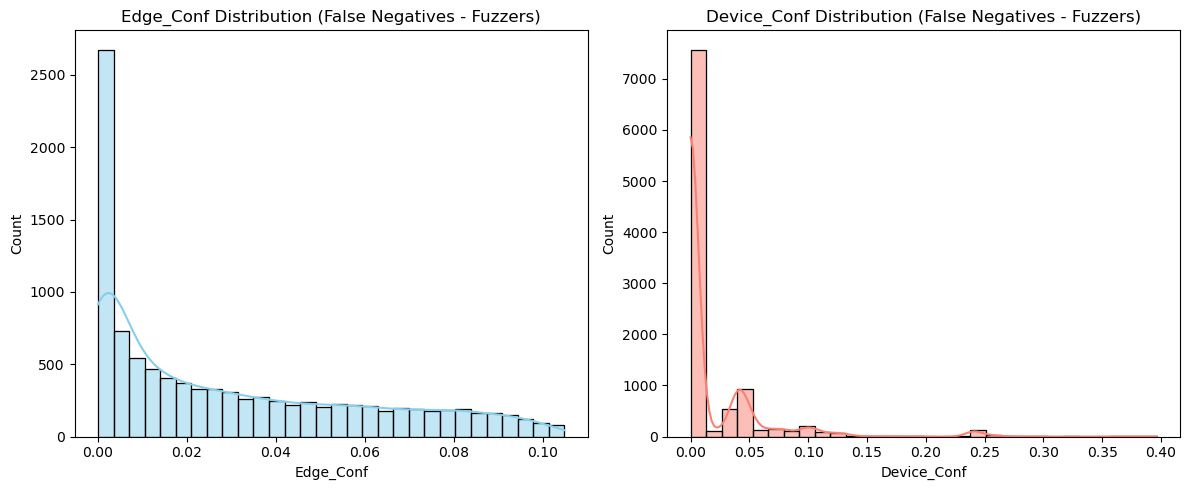

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Fuzzers samples
fuzzers_df = core_results_df[core_results_df["attack_cat"] == "Fuzzers"].copy()

# Identify the false negatives in Fuzzers (True_Label==1 but Fused_Label_LR==0)
false_negatives_fuzzers = fuzzers_df[fuzzers_df["Fused_Label_LR"] == 0]

# Plot histograms for Edge_Conf and Device_Conf for these false negatives
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(false_negatives_fuzzers["Edge_Conf"], bins=30, kde=True, color="skyblue")
plt.title("Edge_Conf Distribution (False Negatives - Fuzzers)")
plt.xlabel("Edge_Conf")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(false_negatives_fuzzers["Device_Conf"], bins=30, kde=True, color="salmon")
plt.title("Device_Conf Distribution (False Negatives - Fuzzers)")
plt.xlabel("Device_Conf")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Option 1: Low-Threshold Override for Fuzzers

# Filter for Fuzzers samples within core_results_df (ensure 'attack_cat' exists)
fuzzers_df = core_results_df[core_results_df["attack_cat"] == "Fuzzers"].copy()
print("Fuzzers samples count:", len(fuzzers_df))

# Create a copy of the logistic fusion predictions for overriding.
fuzzers_df["Fused_Label_Override"] = fuzzers_df["Fused_Label_LR"].copy()

# Apply a low-threshold override: if either Edge_Conf or Device_Conf > 0.01, force label to 1.
override_threshold = 0.01
override_mask = (fuzzers_df["Edge_Conf"] > override_threshold) | (fuzzers_df["Device_Conf"] > override_threshold)
fuzzers_df.loc[override_mask, "Fused_Label_Override"] = 1

# Evaluate the performance for Fuzzers after applying the low-threshold override.
print("\nClassification Report for Fuzzers (After Low-Threshold Override):")
print(classification_report(fuzzers_df["True_Label"], fuzzers_df["Fused_Label_Override"],
                            target_names=["Benign", "Attack"], zero_division=0))

print("\nConfusion Matrix for Fuzzers (After Low-Threshold Override):")
print(confusion_matrix(fuzzers_df["True_Label"], fuzzers_df["Fused_Label_Override"]))

Fuzzers samples count: 24246

Classification Report for Fuzzers (After Low-Threshold Override):
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00         0
      Attack       1.00      0.89      0.94     24246

    accuracy                           0.89     24246
   macro avg       0.50      0.44      0.47     24246
weighted avg       1.00      0.89      0.94     24246


Confusion Matrix for Fuzzers (After Low-Threshold Override):
[[    0     0]
 [ 2748 21498]]


Loading UNSW full processed dataset for inference...
Dataset loaded. Shape: (257673, 79)
Loading Global model (XGBoost)...
Loading Edge model (LSTM)...


Loading Device model (MLP)...
4027/4027 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4027/4027 ━━━━━━━━━━━━━━━━━━━━ 1s 150us/step

Logistic Fusion Model F1 Score on Validation Set: 0.7809
Logistic Fusion Core Accuracy: 0.7254

Logistic Fusion Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.61      0.67      0.64     93000
      Attack       0.80      0.76      0.78    164673

    accuracy                           0.73    257673
   macro avg       0.71      0.71      0.71    257673
weighted avg       0.73      0.73      0.73    257673


Logistic Fusion Core Confusion Matrix:
[[ 62186  30814]
 [ 39945 124728]]

Best Threshold on Logistic Fusion: 0.39999999999999986


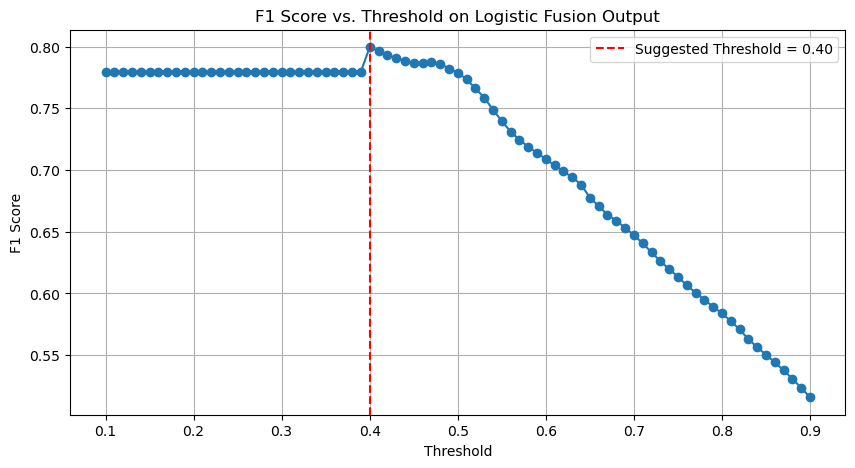

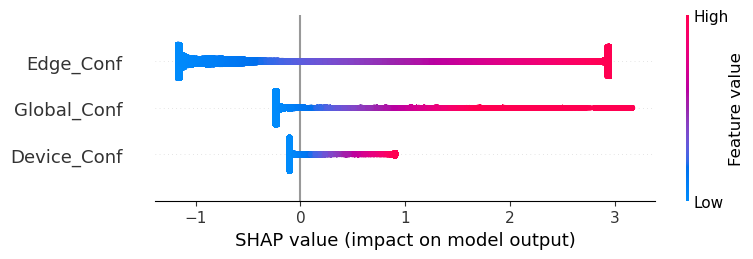

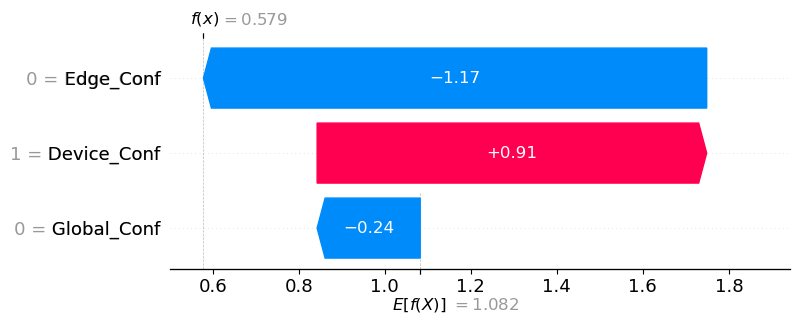


Override applied to 20955 Fuzzers samples using thresholds: Edge>0.01, Device>0.01

=== Overall Metrics with Combined Override for Fuzzers ===
Combined Override Core Accuracy: 0.7540914259546013

Combined Override Core Classification Report:
              precision    recall  f1-score   support

      Benign       0.66      0.67      0.66     93000
      Attack       0.81      0.80      0.81    164673

    accuracy                           0.75    257673
   macro avg       0.73      0.74      0.73    257673
weighted avg       0.76      0.75      0.75    257673


Combined Override Core Confusion Matrix:
[[ 62186  30814]
 [ 32550 132123]]

Per-Attack Category Classification Reports:

--- Normal ---
              precision    recall  f1-score   support

      Benign       1.00      0.67      0.80     93000
      Attack       0.00      0.00      0.00         0

    accuracy                           0.67     93000
   macro avg       0.50      0.33      0.40     93000
weighted avg       1

In [48]:
import os
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, roc_curve, auc, classification_report,
                             accuracy_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import shap

# =================================================================
# Part 1: Setup and Load Data/Models
# =================================================================

# Paths & Directories (Update as needed)
CORE_LAYER_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core"
os.makedirs(CORE_LAYER_DIR, exist_ok=True)

GLOBAL_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Global/xgb_global_model.pkl"
EDGE_MODEL_PATH   = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Edge/LSTM/edge_layer_lstm_best.keras"
DEVICE_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_mlp_model.h5"

UNSW_FEATURE_CSV = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Full_Processed_Master.csv"

# Load and Prepare the UNSW Dataset
print("Loading UNSW full processed dataset for inference...")
df = pd.read_csv(UNSW_FEATURE_CSV)

# Ensure binary label exists; if not, create it
if "binary_label" not in df.columns:
    df["binary_label"] = np.where(df["label"].astype(str).str.lower() == "benign", 0, 1)
df.fillna(0, inplace=True)
print("Dataset loaded. Shape:", df.shape)

# Ensure Global layer has 23 features: add missing columns if necessary
if "fin_flag_cnt" not in df.columns:
    df["fin_flag_cnt"] = 0.0  # Placeholder for FIN Flag Count
if "psh_flag_cnt" not in df.columns:
    df["psh_flag_cnt"] = 0.0  # Placeholder for PSH Flag Count

# Load the trained models
print("Loading Global model (XGBoost)...")
xgb_global = joblib.load(GLOBAL_MODEL_PATH)
print("Loading Edge model (LSTM)...")
edge_lstm = load_model(EDGE_MODEL_PATH)
print("Loading Device model (MLP)...")
device_mlp = load_model(DEVICE_MODEL_PATH)

# =================================================================
# Part 2: Layer-wise Inference and Fusion
# =================================================================

# -- GLOBAL LAYER --
global_features = [
    "dur", "flow_byts_s", "flow_iat_mean", "flow_iat_std", "flow_iat_max",
    "ct_dst_sport_ltm", "proto", "synack", "ackdat", "fin_flag_cnt", "psh_flag_cnt",
    "pkt_len_min", "pkt_len_max", "fwd_pkts_s", "bwd_pkts_s", "fwd_pkt_len_max", "bwd_pkt_len_min",
    "sbytes", "dbytes", "hour_sin", "hour_cos", "weekday_sin", "weekday_cos"
]
X_global = df[global_features].values
y_pred_proba_global = xgb_global.predict_proba(X_global)
# Assuming the benign class is at index 0
attack_conf_global = 1.0 - y_pred_proba_global[:, 0]
global_preds = (attack_conf_global >= 0.5).astype(int)

# -- EDGE LAYER (LSTM) --
edge_features = [
    "pkt_len_min", "pkt_len_max",
    "fwd_pkt_len_max", "bwd_pkt_len_min",
    "fwd_pkts_s", "bwd_pkts_s",
    "fwd_iat_mean"
]
X_edge = df[edge_features].values
scaler_edge = StandardScaler()
X_edge_scaled = scaler_edge.fit_transform(X_edge)
sequence_length = 5
num_samples_edge = X_edge_scaled.shape[0] - sequence_length + 1
X_seq_edge = np.array([X_edge_scaled[i:i+sequence_length] for i in range(num_samples_edge)])
edge_proba = edge_lstm.predict(X_seq_edge, batch_size=64)
attack_conf_edge = 1.0 - edge_proba[:, 0]
# Align the sliding window predictions with original indices
attack_conf_edge_aligned = np.empty(X_edge.shape[0])
attack_conf_edge_aligned[:sequence_length-1] = np.nan  # undefined for initial indices
attack_conf_edge_aligned[sequence_length-1:] = attack_conf_edge
attack_conf_edge_aligned = np.nan_to_num(attack_conf_edge_aligned, nan=0.0)
edge_preds = (attack_conf_edge_aligned >= 0.5).astype(int)

# -- DEVICE LAYER (MLP) --
device_features = [
    "ct_dst_sport_ltm", "fwd_pkt_len_max", "bwd_pkt_len_min", "pkt_len_var",
    "fwd_pkt_len_std", "bwd_pkt_len_std", "dur", "flow_iat_mean", "flow_iat_std",
    "idle_max", "idle_mean", "active_min", "active_max", "init_fwd_win_byts",
    "init_bwd_win_byts", "fwd_hdr_len", "bwd_hdr_len", "pkt_size_avg",
    "fwd_seg_size_avg", "bwd_seg_size_avg", "hour_sin", "hour_cos"
]
X_device = df[device_features].values
scaler_device = StandardScaler()
X_device_scaled = scaler_device.fit_transform(X_device)
device_proba = device_mlp.predict(X_device_scaled, batch_size=64).flatten()
device_preds = (device_proba >= 0.5).astype(int)
attack_conf_device = device_proba

# -- FUSION (Core Layer) --
attack_conf_global = np.array(attack_conf_global)
attack_conf_edge_aligned = np.array(attack_conf_edge_aligned)
attack_conf_device = np.array(attack_conf_device)

# Basic fusion using initial weights
w_global = 0.3
w_edge   = 0.3
w_device = 0.4
fused_score = (w_global * attack_conf_global +
               w_edge * attack_conf_edge_aligned +
               w_device * attack_conf_device)
fused_score = np.nan_to_num(fused_score, nan=0.0)
# Use initial threshold from our prior analysis (0.10 for naive fusion)
best_threshold = 0.10
fused_label_best = (fused_score > best_threshold).astype(int)

# Build core results DataFrame
core_results_df = pd.DataFrame({
    "Global_Conf": attack_conf_global,
    "Edge_Conf": attack_conf_edge_aligned,
    "Device_Conf": attack_conf_device,
    "Fused_Score": fused_score,
    "Fused_Label_LR": fused_label_best,   # Logistic fusion initial default from our earlier model
    "True_Label": df["binary_label"].values
})

# Ensure 'attack_cat' is in core_results_df (merging it from original df)
if "attack_cat" in df.columns:
    core_results_df["attack_cat"] = df["attack_cat"]

# =================================================================
# Part 3: Logistic Fusion for Core Decision
# =================================================================
X_fusion = core_results_df[["Global_Conf", "Edge_Conf", "Device_Conf"]].values
y_fusion = core_results_df["True_Label"].values

X_train, X_val, y_train, y_val = train_test_split(X_fusion, y_fusion, test_size=0.3, random_state=42)
lr_core = LogisticRegression()
lr_core.fit(X_train, y_train)

lr_preds = lr_core.predict(X_val)
lr_proba = lr_core.predict_proba(X_val)[:, 1]
f1_lr = f1_score(y_val, lr_preds)
print(f"\nLogistic Fusion Model F1 Score on Validation Set: {f1_lr:.4f}")

fused_score_lr = lr_core.predict_proba(X_fusion)[:, 1]
fused_label_lr = (fused_score_lr > 0.5).astype(int)

print(f"Logistic Fusion Core Accuracy: {accuracy_score(y_fusion, fused_label_lr):.4f}")
print("\nLogistic Fusion Core Classification Report:")
print(classification_report(y_fusion, fused_label_lr, target_names=["Benign", "Attack"]))
print("\nLogistic Fusion Core Confusion Matrix:")
print(confusion_matrix(y_fusion, fused_label_lr))

# =================================================================
# Part 4: Threshold Sensitivity on Logistic Fusion Output
# =================================================================
thresholds = np.arange(0.1, 0.91, 0.01)
f1_scores = [f1_score(y_fusion, (fused_score_lr > t).astype(int)) for t in thresholds]
best_t = thresholds[np.argmax(f1_scores)]
print(f"\nBest Threshold on Logistic Fusion: {best_t}")

plt.figure(figsize=(10,5))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(x=0.40, color='r', linestyle='--', label='Suggested Threshold = 0.40')
plt.title("F1 Score vs. Threshold on Logistic Fusion Output")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()

# =================================================================
# Part 5: SHAP Analysis for Logistic Fusion Model
# =================================================================
explainer = shap.Explainer(lr_core, X_fusion, feature_names=["Global_Conf", "Edge_Conf", "Device_Conf"])
shap_values = explainer(X_fusion)

# Global summary plot
shap.summary_plot(shap_values, features=X_fusion, feature_names=["Global_Conf", "Edge_Conf", "Device_Conf"])

# Single instance force and waterfall plot for interpretability, e.g. for sample index 12345
row_idx = 12345
shap.initjs()
shap.plots.force(shap_values[row_idx])
shap.plots.waterfall(shap_values[row_idx])

# =================================================================
# Part 6: Combined Override for Fuzzers (Adaptive Tuning)
# =================================================================
# For "Fuzzers", we apply a low threshold override:
# Given that Fuzzers are all Attack flows, let's force label as Attack for Fuzzers when conditions are met.
# Here, based on histogram analysis, we set very low thresholds:
override_edge_threshold = 0.01  # Aggressively low threshold, safe if "Fuzzers" has no benign examples
override_device_threshold = 0.01

fused_label_override = fused_label_lr.copy()
fuzzers_mask = (core_results_df["attack_cat"] == "Fuzzers")
override_mask = fuzzers_mask & (
    (core_results_df["Edge_Conf"] > override_edge_threshold) | (core_results_df["Device_Conf"] > override_device_threshold)
)
# Count how many Fuzzers get overridden
num_overridden = override_mask.sum()
print(f"\nOverride applied to {num_overridden} Fuzzers samples using thresholds: Edge>{override_edge_threshold}, Device>{override_device_threshold}")

fused_label_override[override_mask] = 1

# Evaluate performance over the entire dataset using the overridden predictions
print("\n=== Overall Metrics with Combined Override for Fuzzers ===")
print("Combined Override Core Accuracy:", accuracy_score(y_fusion, fused_label_override))
print("\nCombined Override Core Classification Report:")
print(classification_report(y_fusion, fused_label_override, target_names=["Benign", "Attack"]))
print("\nCombined Override Core Confusion Matrix:")
print(confusion_matrix(y_fusion, fused_label_override))

# =================================================================
# Part 7: Per-Attack Category Evaluation
# =================================================================
if "attack_cat" in core_results_df.columns:
    unique_cats = core_results_df["attack_cat"].unique()
    print("\nPer-Attack Category Classification Reports:")
    for cat in unique_cats:
        mask = core_results_df["attack_cat"] == cat
        y_true_cat = core_results_df.loc[mask, "True_Label"]
        y_pred_cat = fused_label_override[mask]
        print(f"\n--- {cat} ---")
        print(classification_report(y_true_cat, y_pred_cat, target_names=["Benign", "Attack"], zero_division=0))
else:
    print("\n'attack_cat' column not found in core_results_df.")

# =================================================================
# Part 8: Save Final Core Fusion Results to CSV
# =================================================================
core_results_df["Fused_Label_LR"] = fused_label_lr
core_results_df["Fused_Label_Override"] = fused_label_override
csv_core_path = os.path.join(CORE_LAYER_DIR, "core_layer_results_logistic_fusion.csv")
core_results_df.to_csv(csv_core_path, index=False)
print(f"\nCore layer fusion (logistic regression with override) results saved to: {csv_core_path}")

print("\n✅ INADS Core Layer Refinement Completed, Commander!")

In [50]:
import os
import numpy as np
import pandas as pd
import joblib
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ================================
# Part 1: Setup and Load Data/Models
# ================================

# Define paths and directories (update paths as needed)
CORE_LAYER_DIR = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Core"
os.makedirs(CORE_LAYER_DIR, exist_ok=True)

GLOBAL_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Global/xgb_global_model.pkl"
EDGE_MODEL_PATH   = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Edge/LSTM/edge_layer_lstm_best.keras"
DEVICE_MODEL_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/Models/Final/Device/device_layer_mlp_model.h5"

# Set the dataset path. This code works similarly on UNSW-NB15 or CICIDS 2018 
DATA_PATH = "/Users/akashthanneeru/Desktop/INADS_Data/UNSW/UNSW_Full_Processed_Master.csv"

print("Loading dataset...")
df = pd.read_csv(DATA_PATH)
print("Dataset loaded successfully. Shape:", df.shape)

# Create binary label: ensure 0=Benign and 1=Attack (adjust as needed per dataset)
if "Binary_Label" not in df.columns:
    df["Binary_Label"] = np.where(df["Label"].str.lower() == "benign", 0, 1)

# For UNSW, if needed, you might add additional column modifications (e.g., creating attack_cat)
# Here, we assume our dataset is already preprocessed for fusion.

print("Loading Global model...")
xgb_global = joblib.load(GLOBAL_MODEL_PATH)      # XGBoost
print("Loading Edge model...")
edge_lstm = load_model(EDGE_MODEL_PATH)           # LSTM
print("Loading Device model...")
device_mlp = load_model(DEVICE_MODEL_PATH)        # MLP

# ================================
# Part 2: Layer-wise Predictions and Fusion (as performed earlier)
# ================================

# GLOBAL LAYER
global_features = [
    "dur", "flow_byts_s", "flow_iat_mean", "flow_iat_std", "flow_iat_max",
    "ct_dst_sport_ltm", "proto", "synack", "ackdat", "fin_flag_cnt", "psh_flag_cnt",
    "pkt_len_min", "pkt_len_max", "fwd_pkts_s", "bwd_pkts_s",
    "fwd_pkt_len_max", "bwd_pkt_len_min", "sbytes", "dbytes",
    "hour_sin", "hour_cos", "weekday_sin", "weekday_cos"
]
X_global = df[global_features].values
y_pred_proba_global = xgb_global.predict_proba(X_global)
attack_conf_global = 1.0 - y_pred_proba_global[:, 0]

# EDGE LAYER (LSTM)
edge_features = [
    "pkt_len_min", "pkt_len_max", "fwd_pkt_len_max", "bwd_pkt_len_min",
    "fwd_pkts_s", "bwd_pkts_s", "fwd_iat_mean"
]
X_edge = df[edge_features].values
scaler_edge = StandardScaler()
X_edge_scaled = scaler_edge.fit_transform(X_edge)
sequence_length = 5
num_samples_edge = X_edge_scaled.shape[0] - sequence_length + 1
X_seq_edge = np.array([X_edge_scaled[i:i+sequence_length] for i in range(num_samples_edge)])
edge_proba = edge_lstm.predict(X_seq_edge, batch_size=64)
attack_conf_edge = 1.0 - edge_proba[:, 0]
attack_conf_edge_aligned = np.empty(X_edge.shape[0])
attack_conf_edge_aligned[:sequence_length-1] = np.nan
attack_conf_edge_aligned[sequence_length-1:] = attack_conf_edge
attack_conf_edge_aligned = np.nan_to_num(attack_conf_edge_aligned, nan=0.0)

# DEVICE LAYER (MLP)
device_features = [
    "ct_dst_sport_ltm", "fwd_pkt_len_max", "bwd_pkt_len_min", "pkt_len_var",
    "fwd_pkt_len_std", "bwd_pkt_len_std", "dur", "flow_iat_mean", "flow_iat_std",
    "idle_max", "idle_mean", "active_min", "active_max", "init_fwd_win_byts",
    "init_bwd_win_byts", "fwd_hdr_len", "bwd_hdr_len", "pkt_size_avg",
    "fwd_seg_size_avg", "bwd_seg_size_avg", "hour_sin", "hour_cos"
]
X_device = df[device_features].values
scaler_device = StandardScaler()
X_device_scaled = scaler_device.fit_transform(X_device)
device_proba = device_mlp.predict(X_device_scaled, batch_size=64).flatten()
attack_conf_device = device_proba

# Fuse layer confidences (using weighted average)
attack_conf_global = np.array(attack_conf_global)
attack_conf_edge_aligned = np.array(attack_conf_edge_aligned)
attack_conf_device = np.array(attack_conf_device)

w_global, w_edge, w_device = 0.3, 0.3, 0.4
fused_score = (w_global * attack_conf_global + w_edge * attack_conf_edge_aligned + w_device * attack_conf_device)
fused_score = np.nan_to_num(fused_score, nan=0.0)
# For initial fusion, use a simple threshold (e.g., 0.10)
best_threshold = 0.10
fused_label = (fused_score > best_threshold).astype(int)

y_true = df["Binary_Label"].values
print(f"Basic Fusion Core Accuracy: {accuracy_score(y_true, fused_label):.4f}")
print("\nBasic Fusion Core Classification Report:")
print(classification_report(y_true, fused_label, target_names=["Benign", "Attack"]))

# ================================
# Part 3: Neural Fusion Core (Approach A)
# ================================
# Prepare fusion features: Stack Global, Edge, and Device confidences.
X_fusion = np.column_stack((attack_conf_global, attack_conf_edge_aligned, attack_conf_device))
y_fusion = y_true

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_fusion, y_fusion, test_size=0.3, random_state=42)

# Build the neural fusion model using Keras
def build_neural_fusion_model(input_dim=3):
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate and summarize the model
neural_fusion_model = build_neural_fusion_model(input_dim=3)
neural_fusion_model.summary()

# Train the neural fusion model
history = neural_fusion_model.fit(X_train, y_train, epochs=50, batch_size=32,
                                  validation_data=(X_val, y_val), verbose=1)

# Evaluate the neural fusion model on the validation set
loss, acc_nn = neural_fusion_model.evaluate(X_val, y_val, verbose=0)
print(f"\nNeural Fusion Core Accuracy on Validation: {acc_nn:.4f}")

# Generate predictions on the entire dataset
fused_score_nn = neural_fusion_model.predict(X_fusion, batch_size=64).flatten()
fused_label_nn = (fused_score_nn > 0.5).astype(int)

print("\nNeural Fusion Core Classification Report:")
print(classification_report(y_fusion, fused_label_nn, target_names=["Benign", "Attack"]))
print("\nNeural Fusion Core Confusion Matrix:")
print(confusion_matrix(y_fusion, fused_label_nn))

# ================================
# Part 4: SHAP Analysis for Neural Fusion Model
# ================================
# Here, we use SHAP to interpret the neural fusion core model.
# Note: The SHAP explainer for deep learning models can be computationally heavy.
explainer_nn = shap.Explainer(neural_fusion_model, X_fusion, feature_names=["Global_Conf", "Edge_Conf", "Device_Conf"])
shap_values_nn = explainer_nn(X_fusion)

# Display a global SHAP summary plot for the neural fusion model
shap.summary_plot(shap_values_nn, features=X_fusion, feature_names=["Global_Conf", "Edge_Conf", "Device_Conf"])

# Display a force plot and a waterfall plot for a sample instance (e.g., index 12345)
row_idx = 12345
shap.initjs()
shap.plots.force(shap_values_nn[row_idx])
shap.plots.waterfall(shap_values_nn[row_idx])

# ================================
# Part 5: Save Neural Fusion Core Results to CSV
# ================================
neural_results_df = pd.DataFrame({
    "Global_Conf": attack_conf_global,
    "Edge_Conf": attack_conf_edge_aligned,
    "Device_Conf": attack_conf_device,
    "Fused_Score_NN": fused_score_nn,
    "Fused_Label_NN": fused_label_nn,
    "True_Label": y_true
})
csv_neural_path = os.path.join(CORE_LAYER_DIR, "core_layer_results_neural_fusion.csv")
neural_results_df.to_csv(csv_neural_path, index=False)
print(f"\nNeural fusion core results saved to: {csv_neural_path}")

print("\n✅ Neural Fusion Core implementation complete, Commander!")

Loading dataset...
Dataset loaded successfully. Shape: (257673, 79)


KeyError: 'Label'